**Paper**: https://www.aimspress.com/article/doi/10.3934/DSFE.2021010?viewType=HTML

# **Preproccessing**

In [1]:
pip install xgboost scikit-learn lime shap matplotlib pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=be500ed4a29cb2619aba3e0ad0fa466db9ac288db6ca9b6908d552a13f492fc0
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import lime.lime_tabular

**Load data as csv file**

In [3]:
data= pd.read_csv("data.csv")

**Display first 10 records of data to show data columns and types of data to understand data well**

In [4]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

**Display data description to show statistics of the Data(mean, std, min, max etc) for each column in data**

In [5]:
print("Data Description:", data.describe())

Data Description:          Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%        

**using data.info() to display all information about datatset show dtypes  and Non-Null count for each column**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**show the Number of Null values in the dataset to determine, based on results, how to handle null values and in which columns contain null values to replace it**

In [7]:
print("Null values:", data.isnull().sum())

Null values: Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


**Handle columns that contain missing values by using the mean technique for all columns with a numeric datatype**

In [8]:
for col in data.columns:
    if data[col].isnull().any():
        if pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].mean(), inplace=True)

**show if there is any duplicates in dataset or not to handle it**

In [9]:
duplicates = data.duplicated().sum()
print(duplicates)

0


**Apply LabelEncoding Technique to convert features from categorical features (string datatype columns in dataset) into numerical features (that contain in the range 0 to 1)  to be easy to apply any Feature selection technique to prepare data well**

In [10]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if pd.api.types.is_string_dtype(data[col]):
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        print(f"Label Encoded column {col} successfully")

**Feature scaling using StandardScaler**

In [11]:
target_col = 'Bankrupt?'

scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop(target_col)
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

**display boxplot for each feature in dataset that help to understand outlier in dataset carefully**

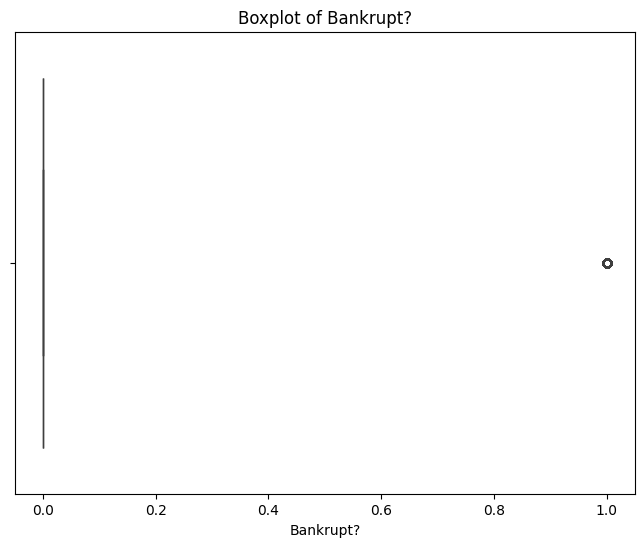

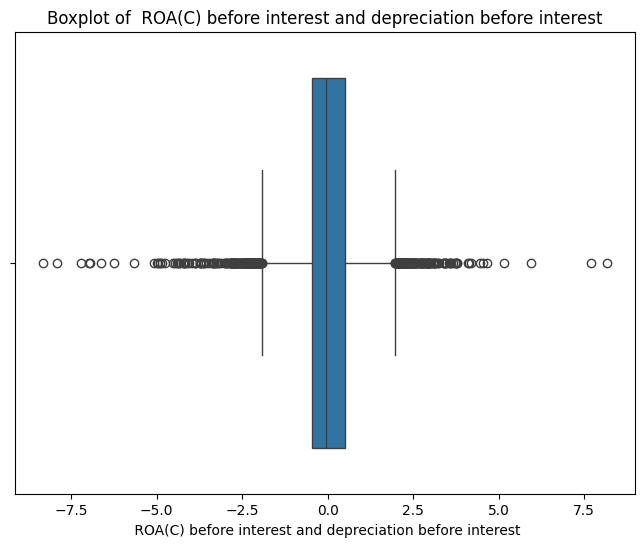

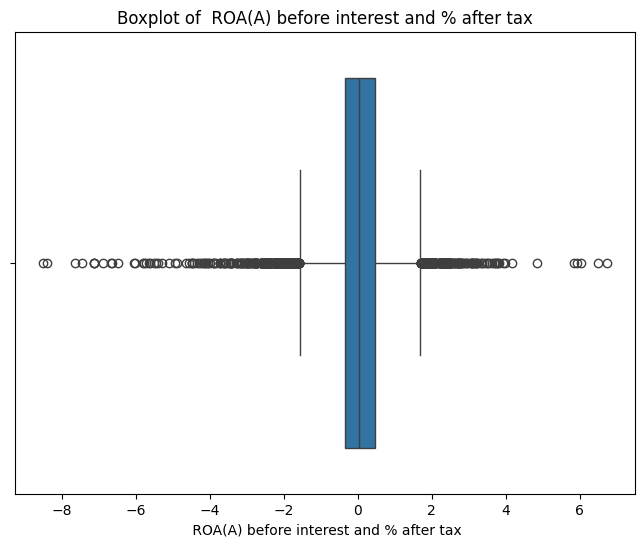

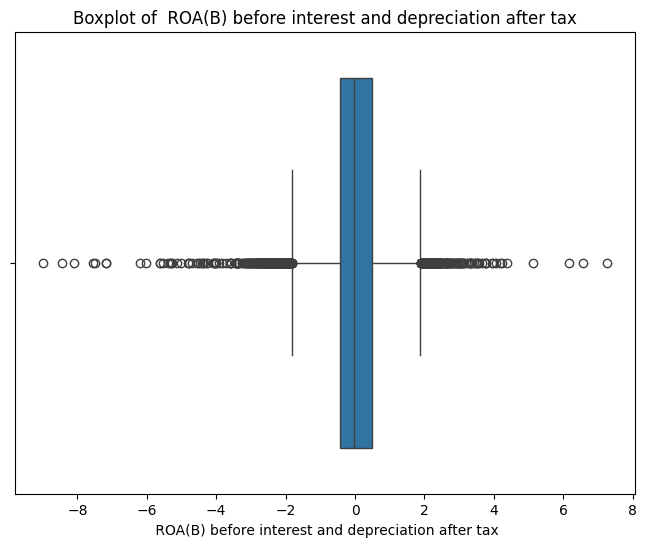

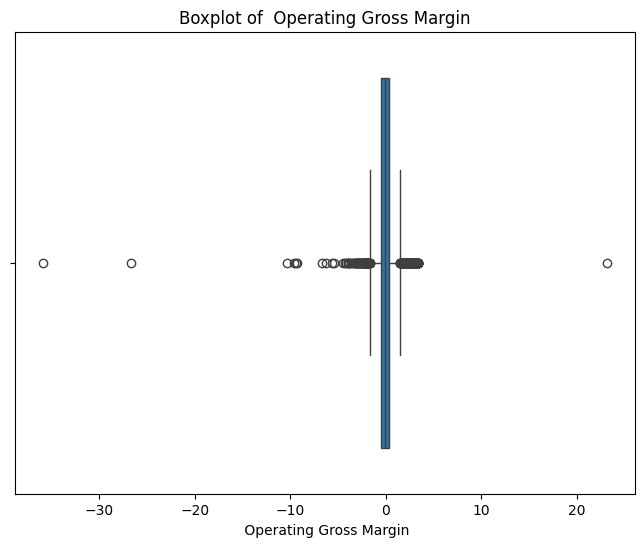

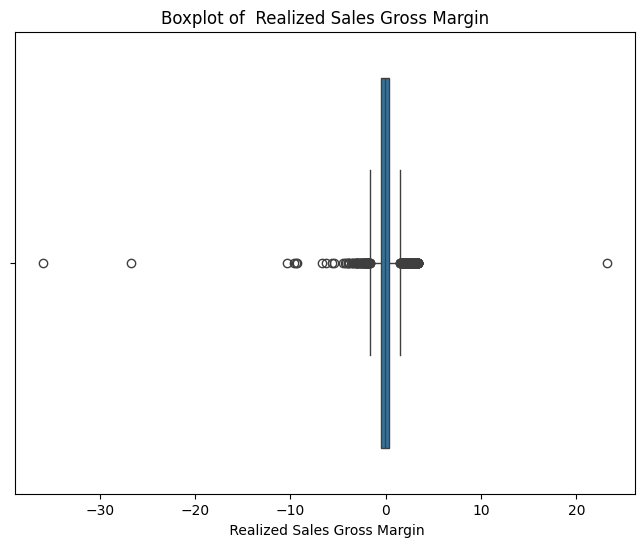

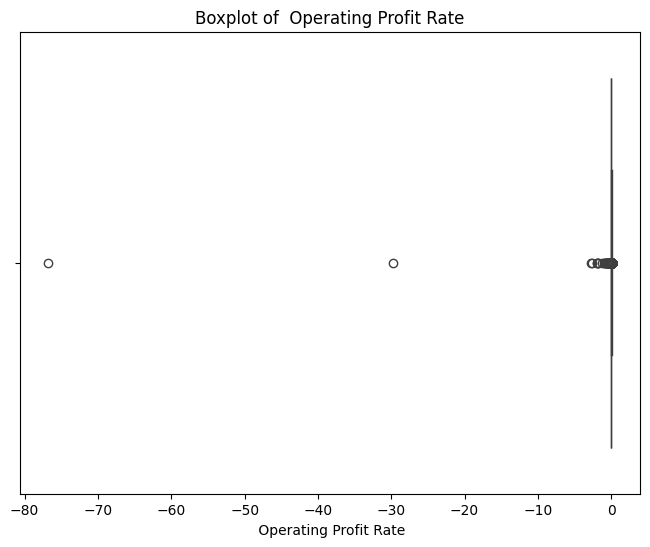

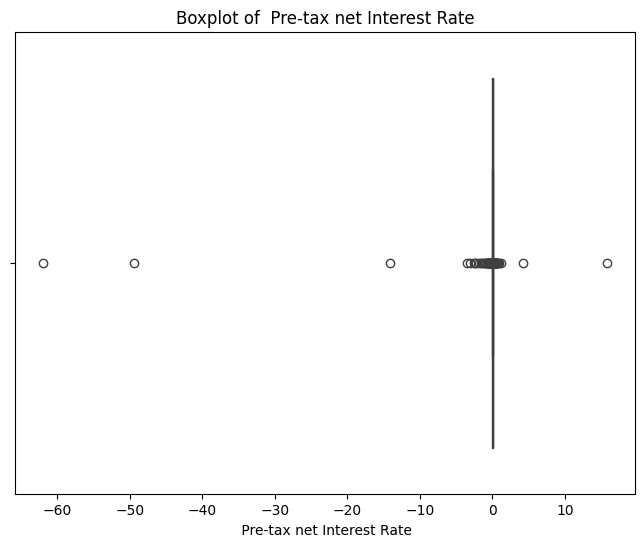

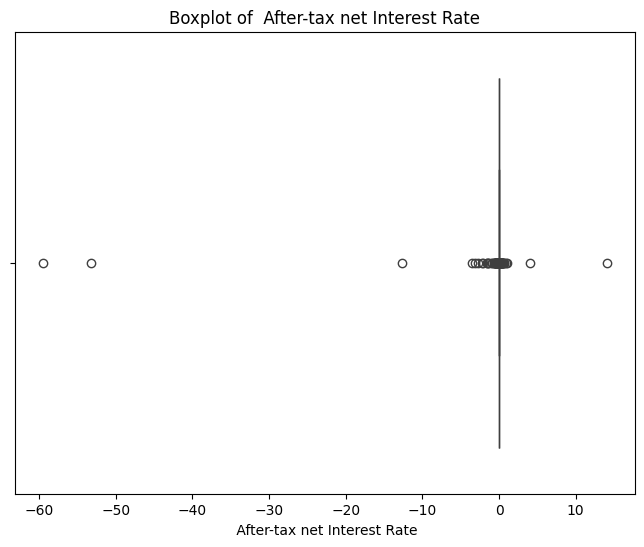

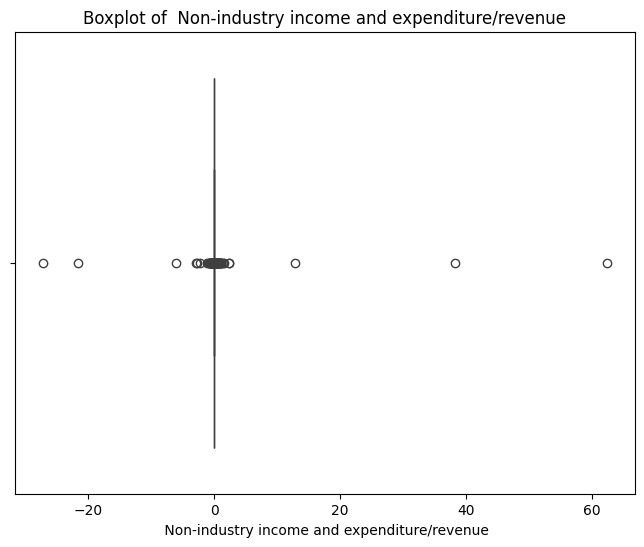

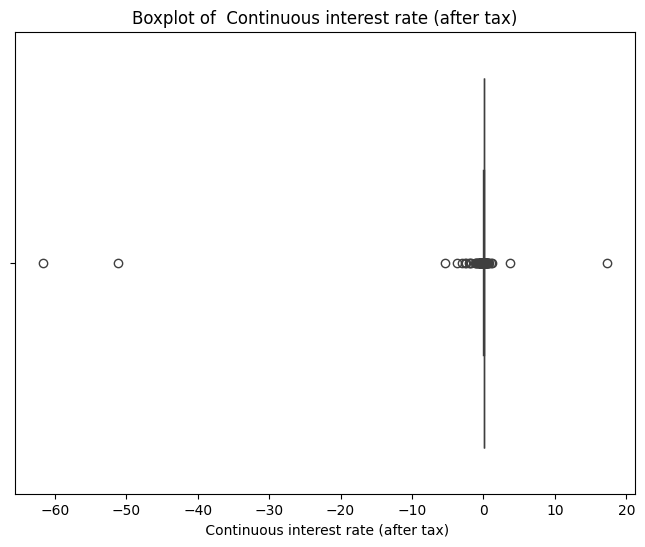

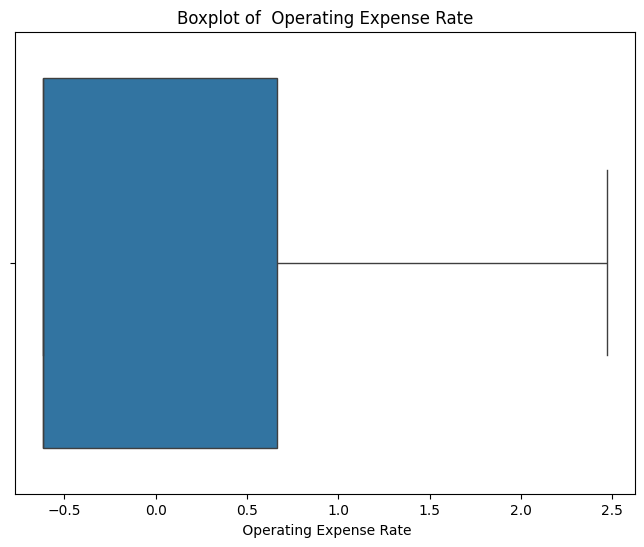

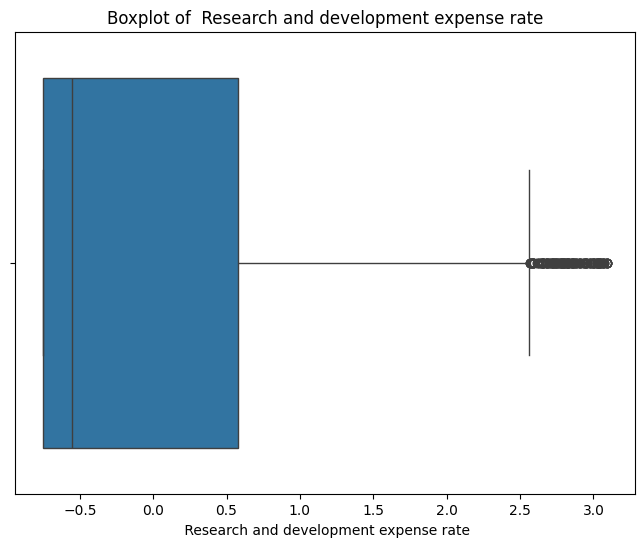

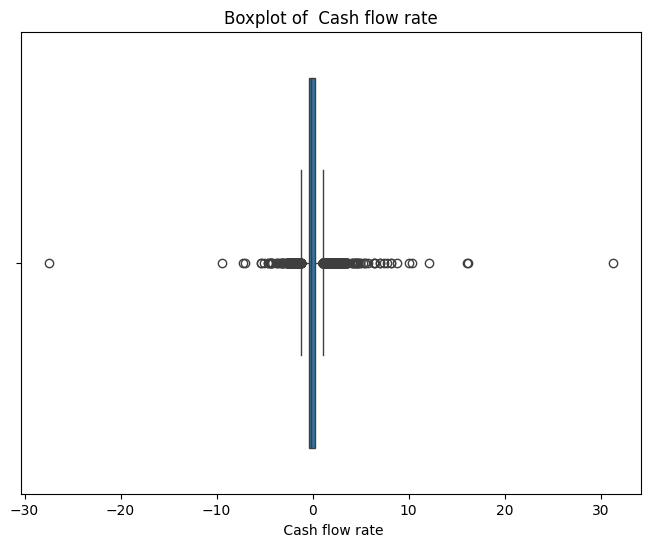

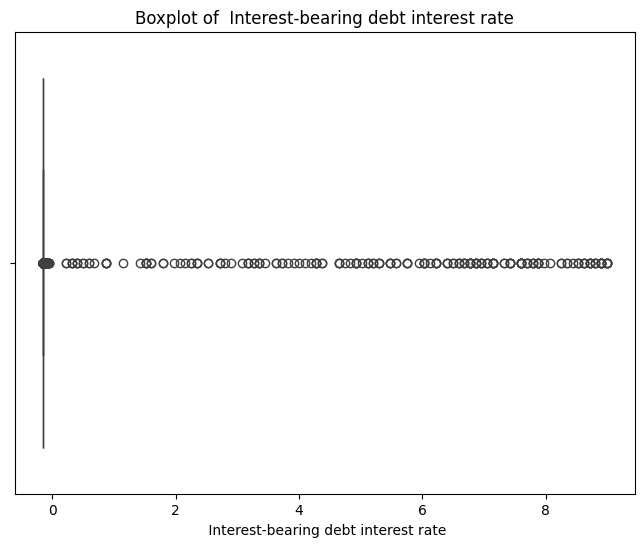

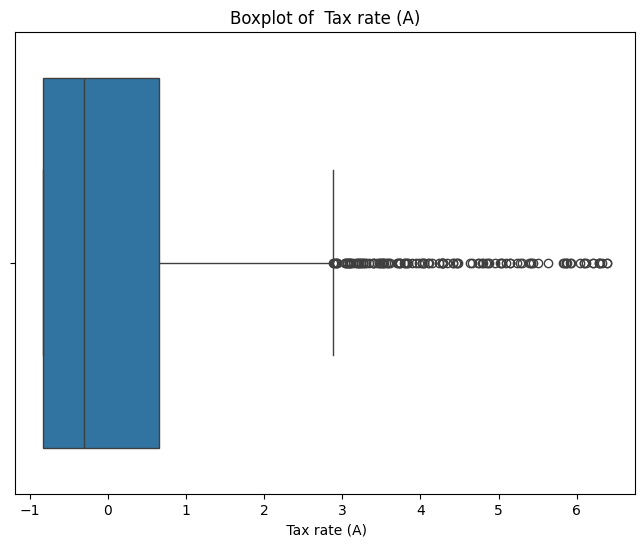

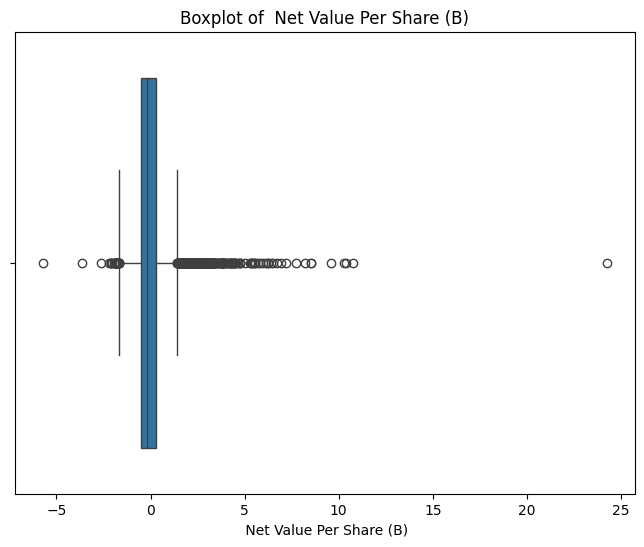

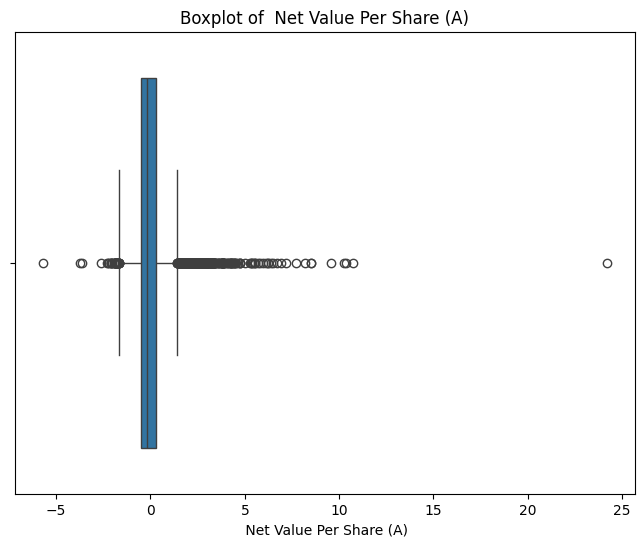

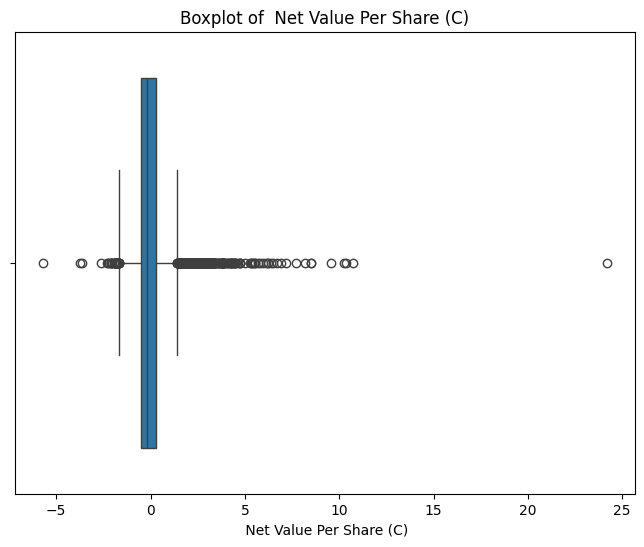

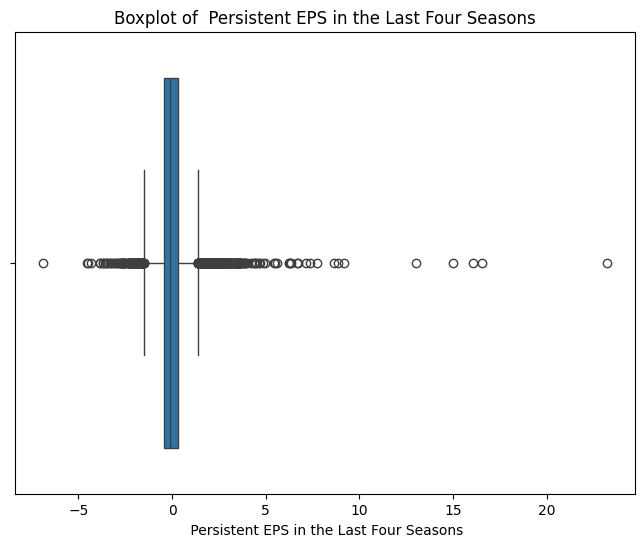

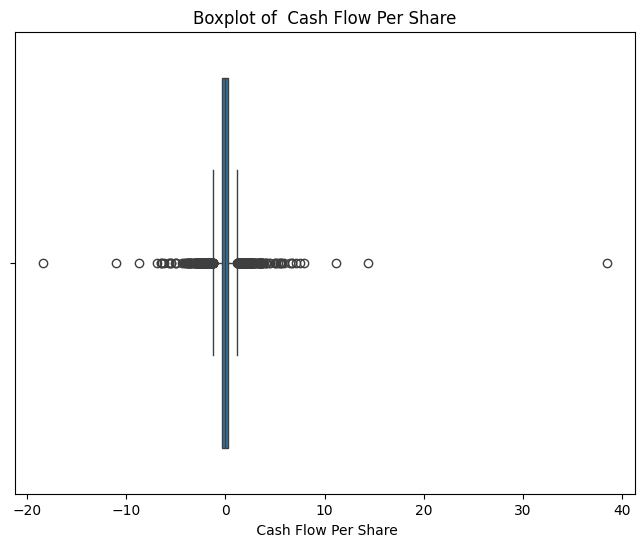

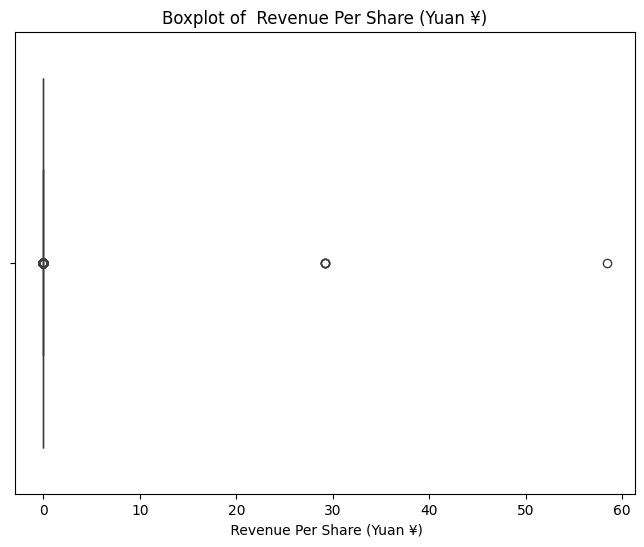

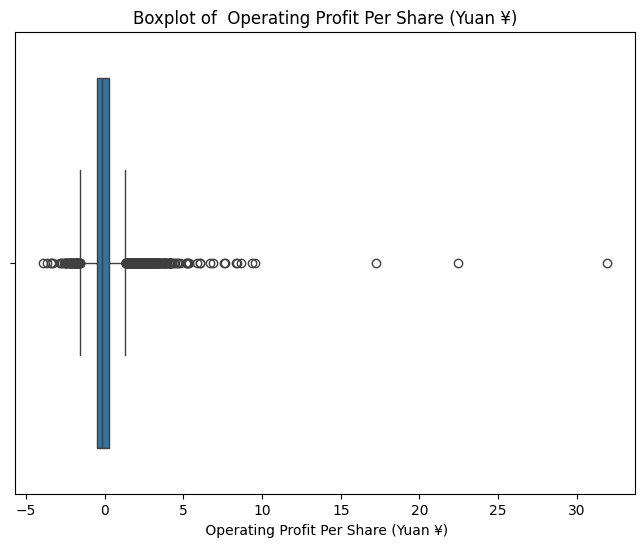

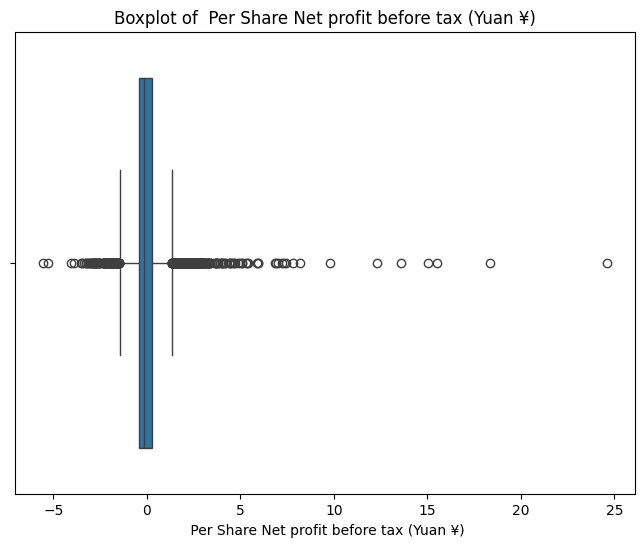

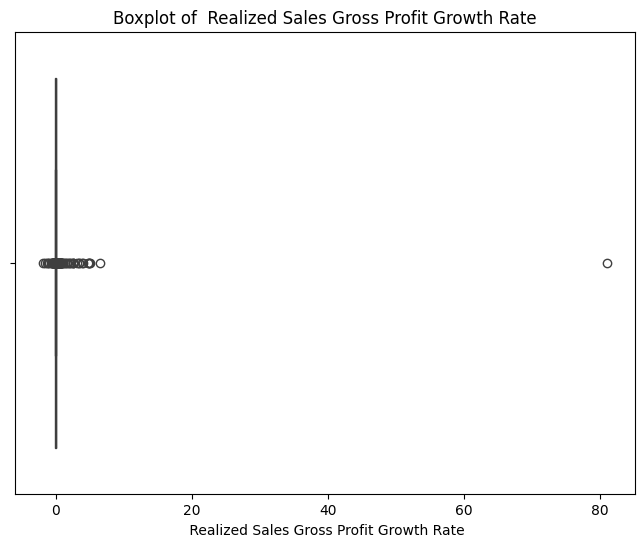

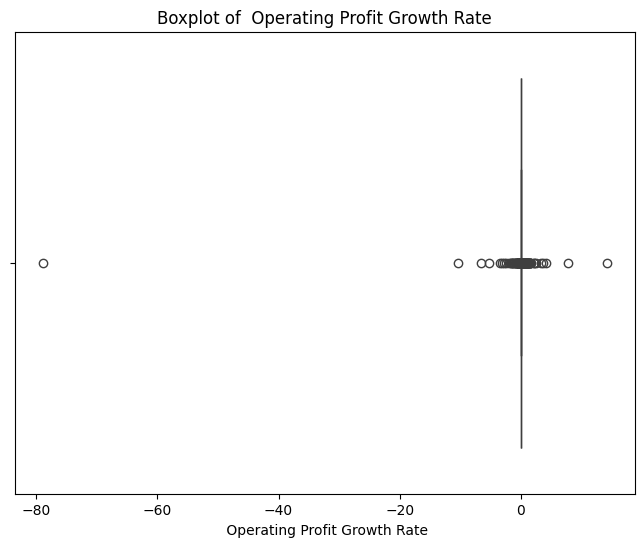

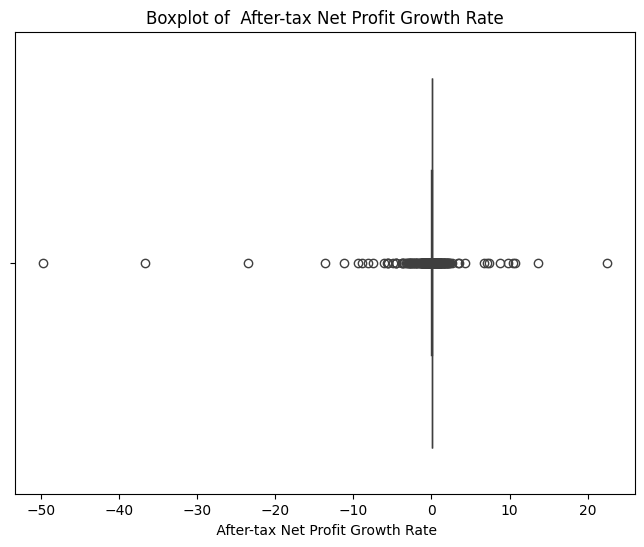

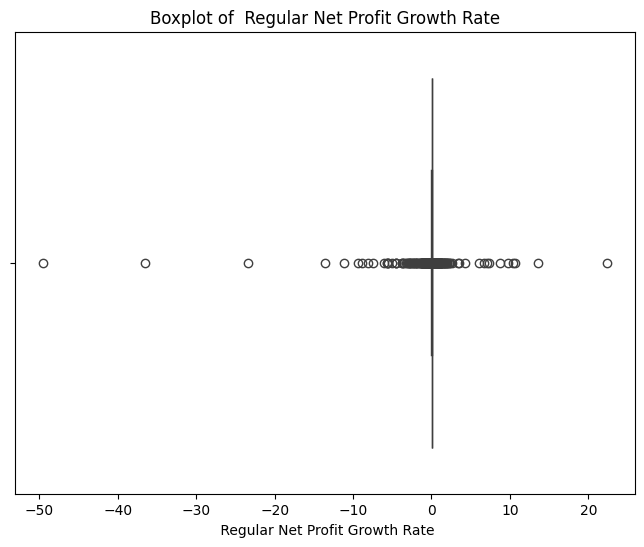

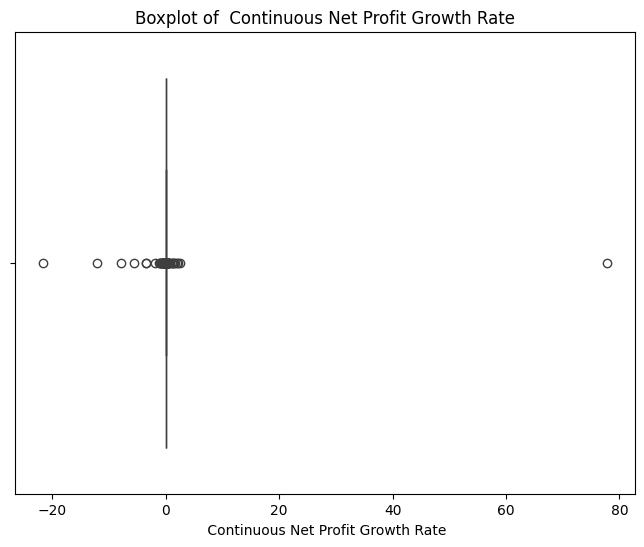

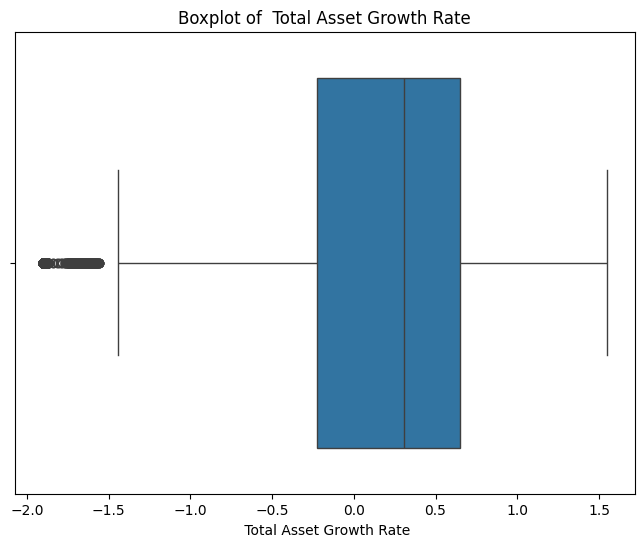

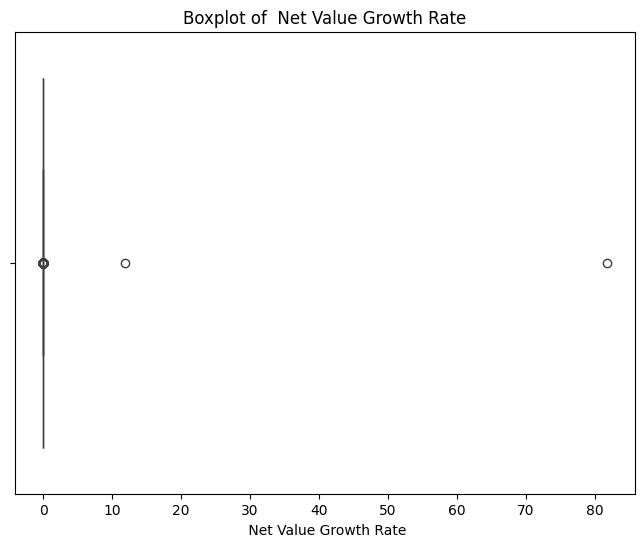

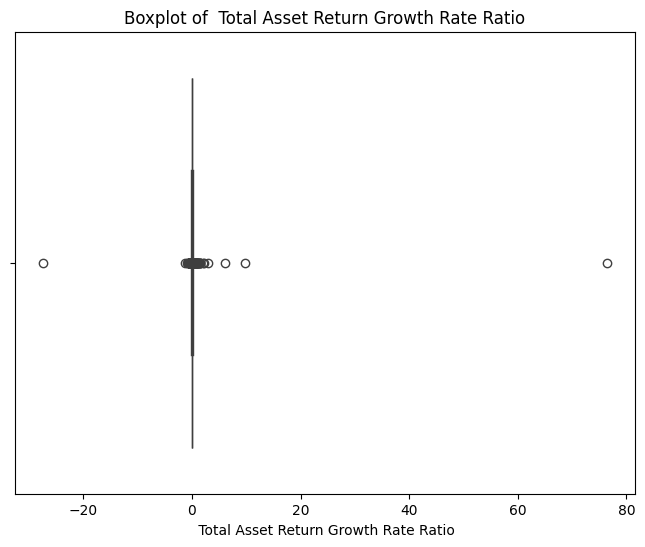

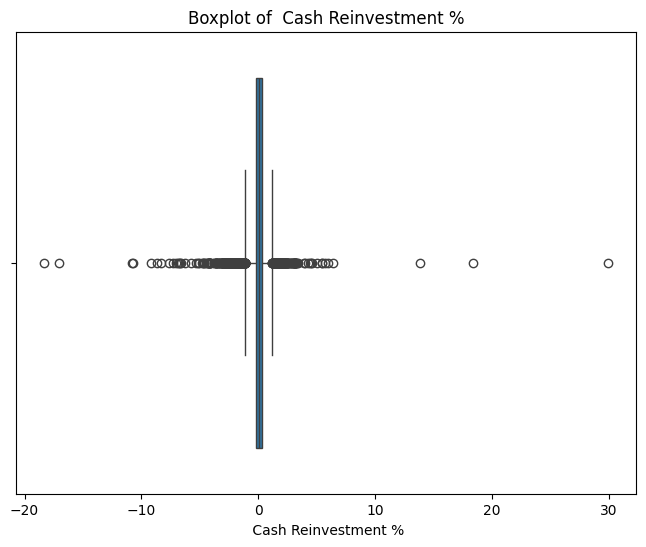

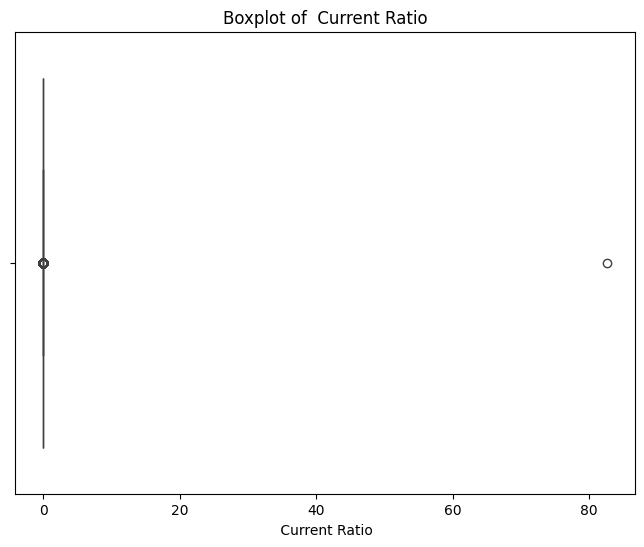

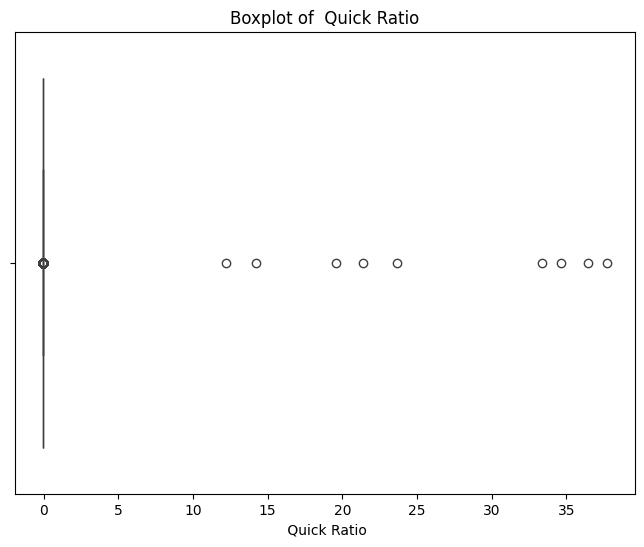

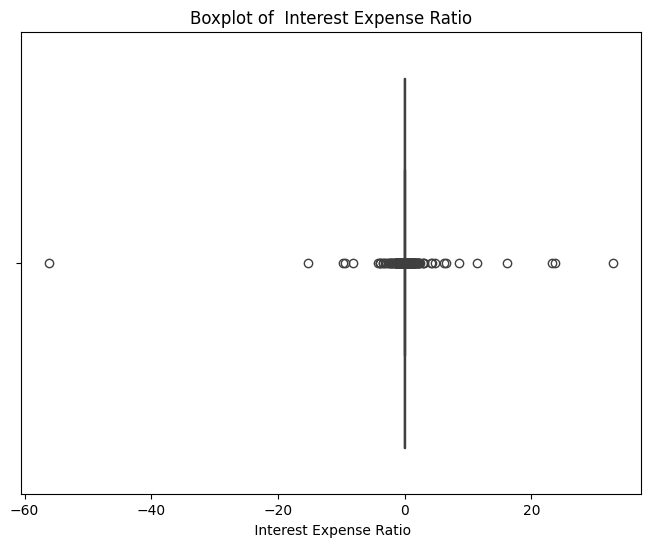

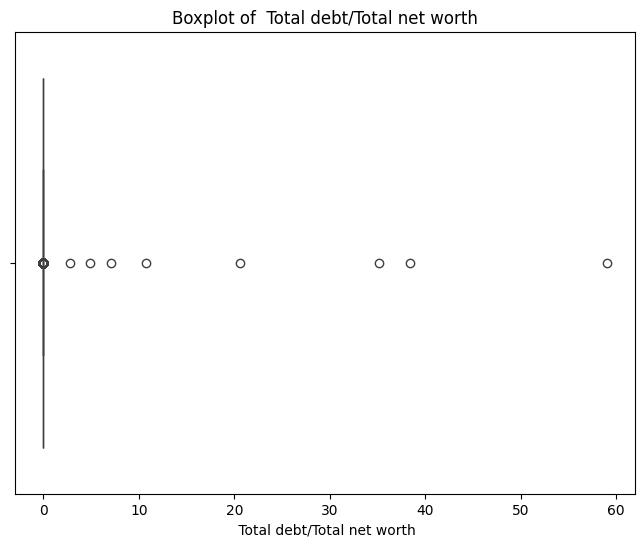

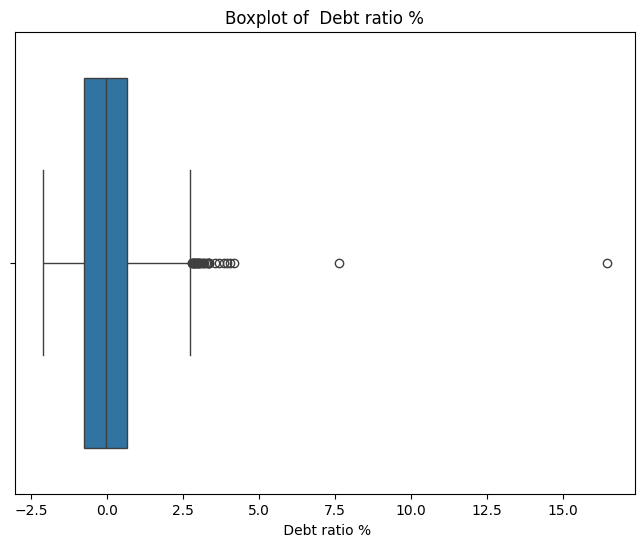

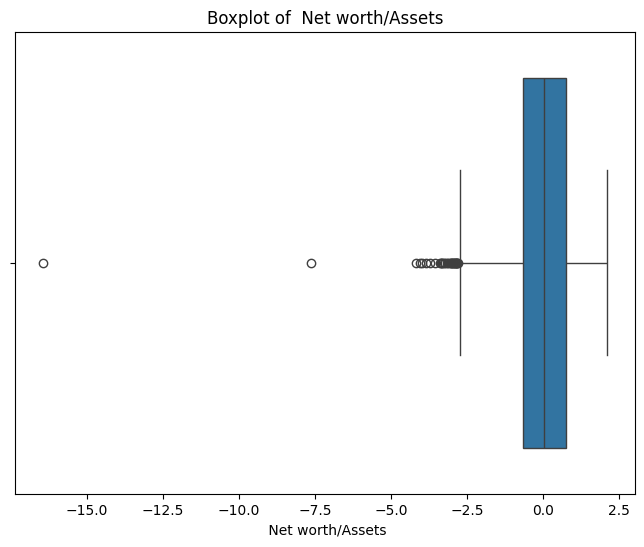

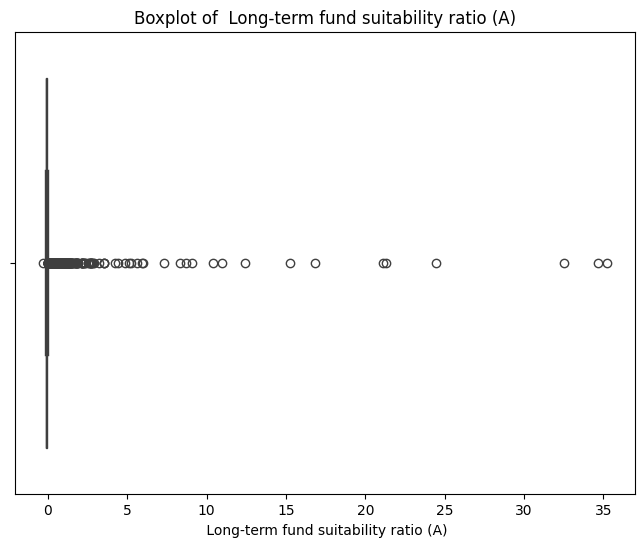

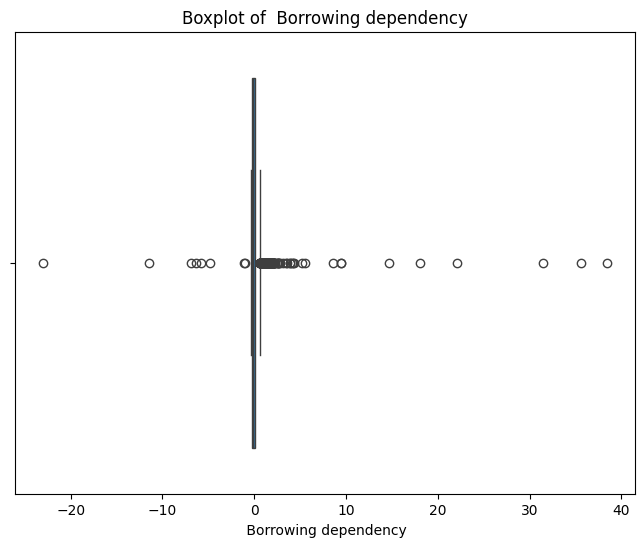

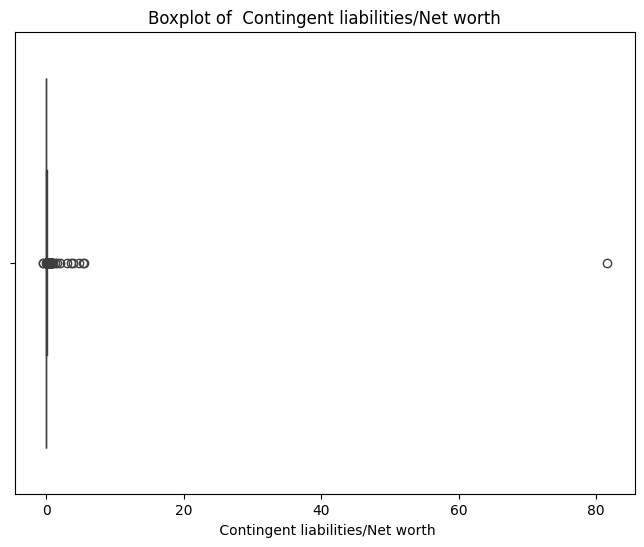

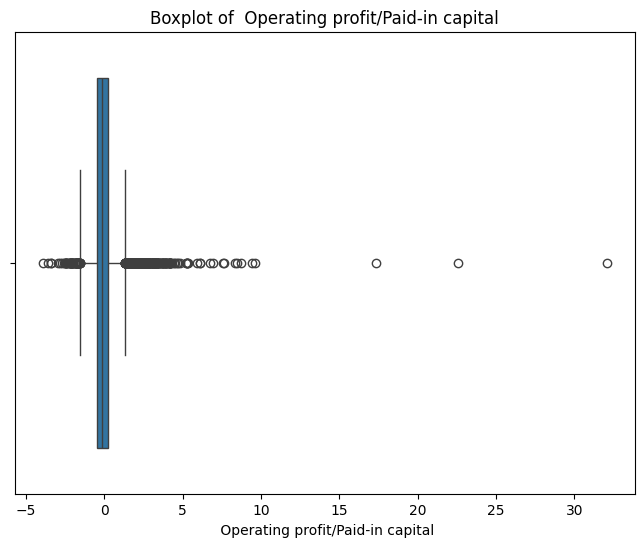

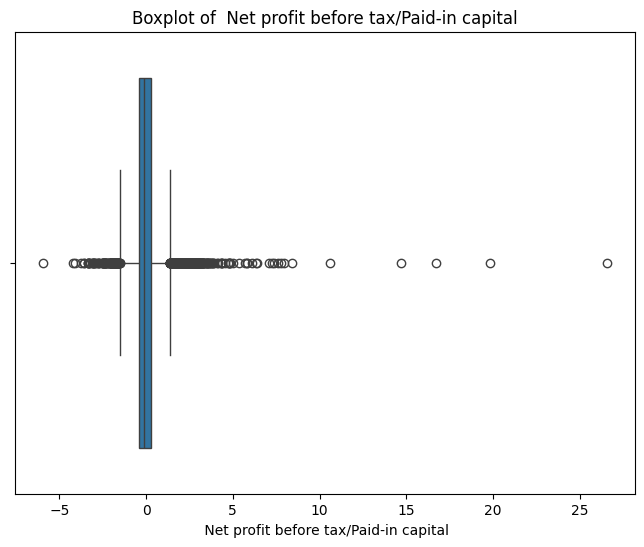

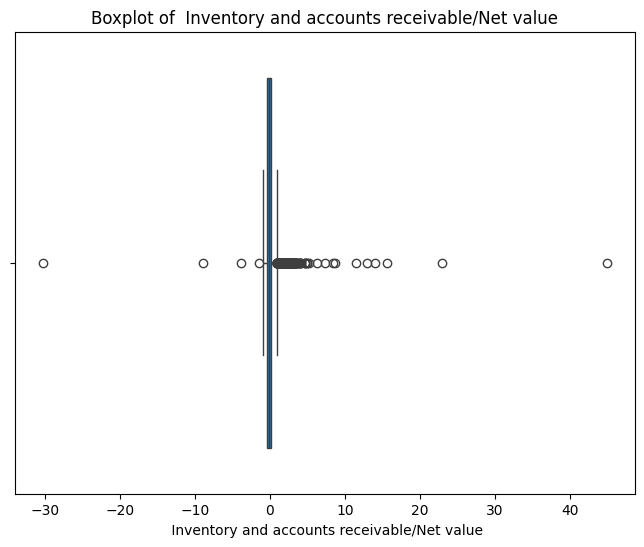

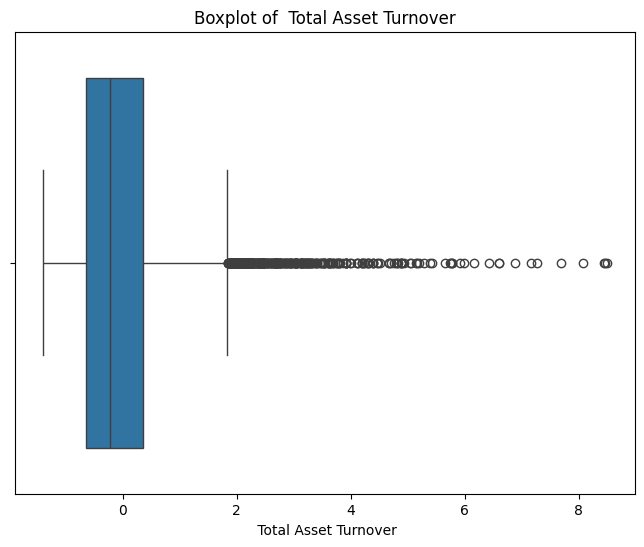

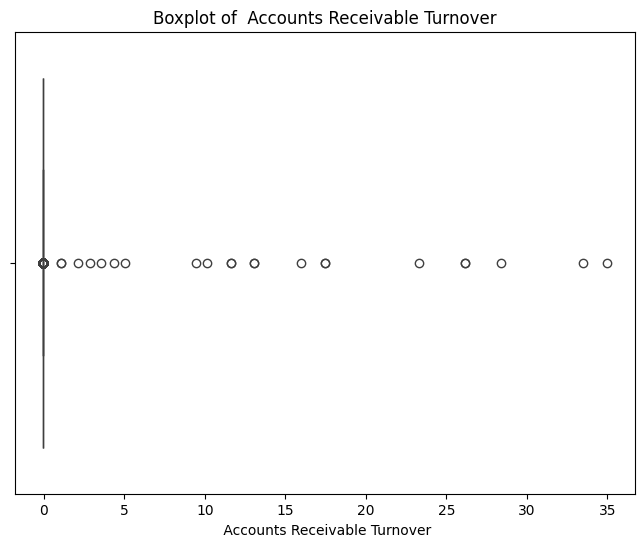

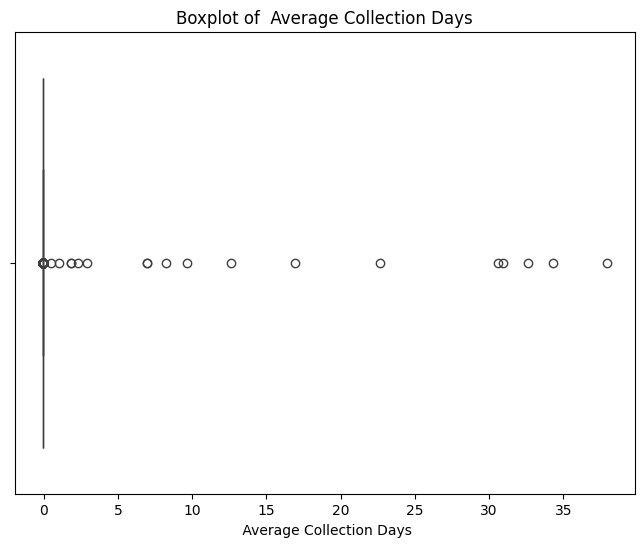

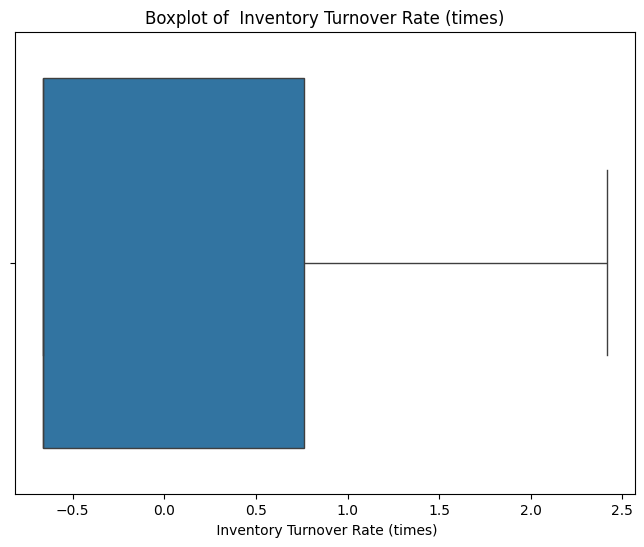

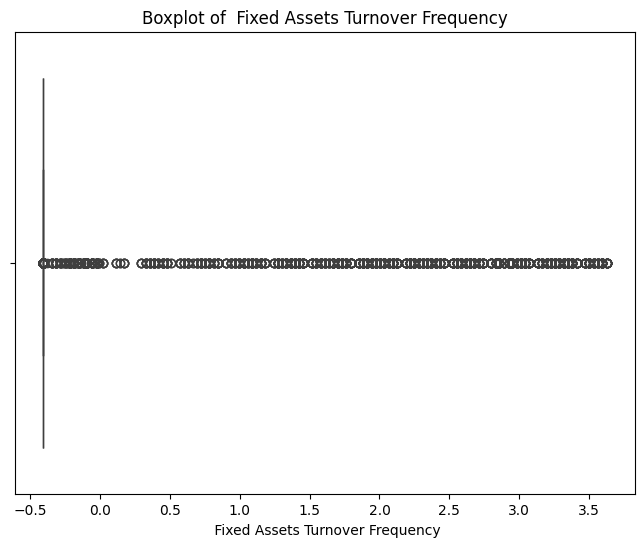

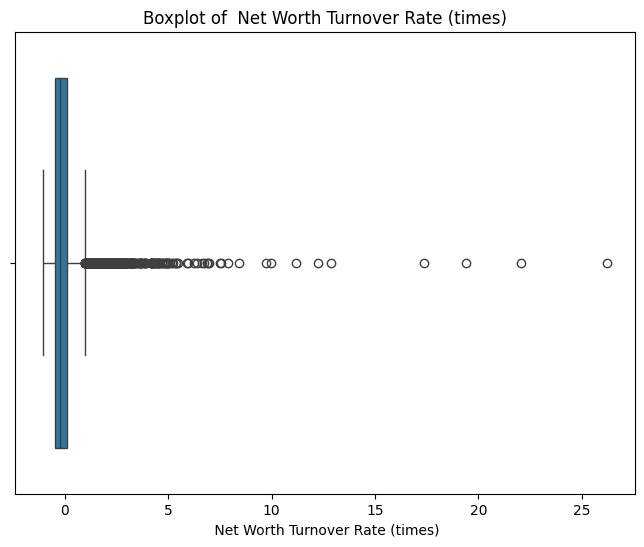

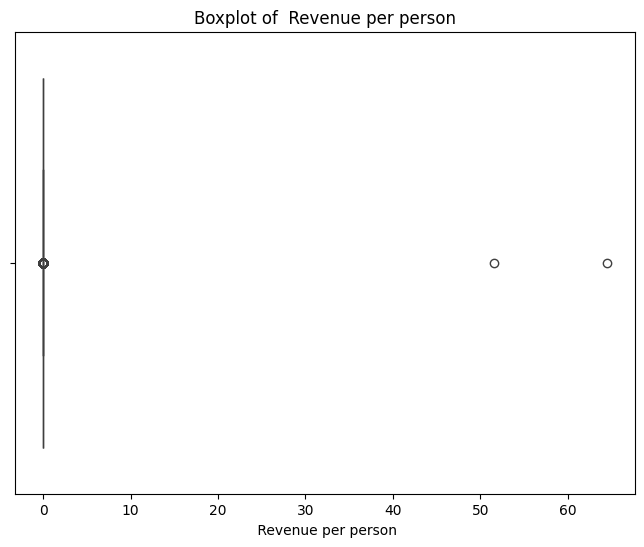

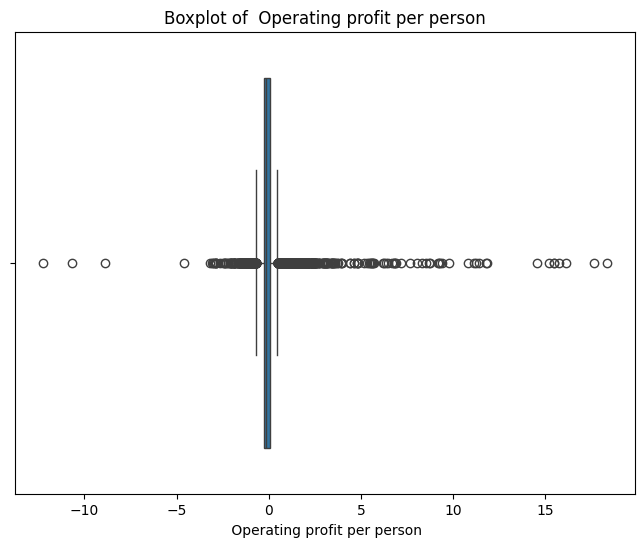

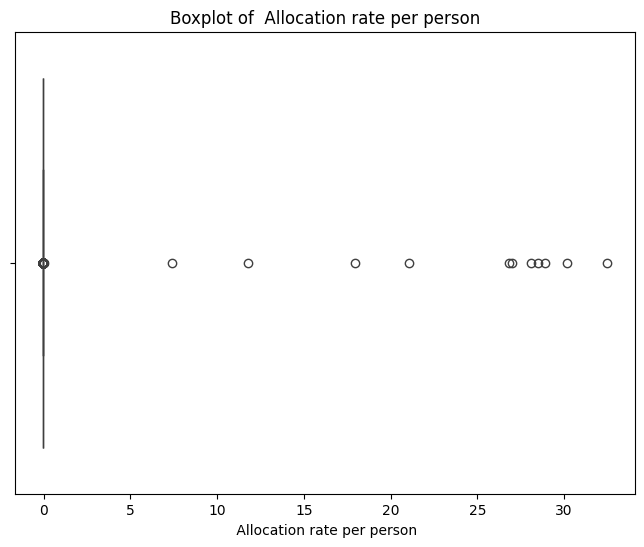

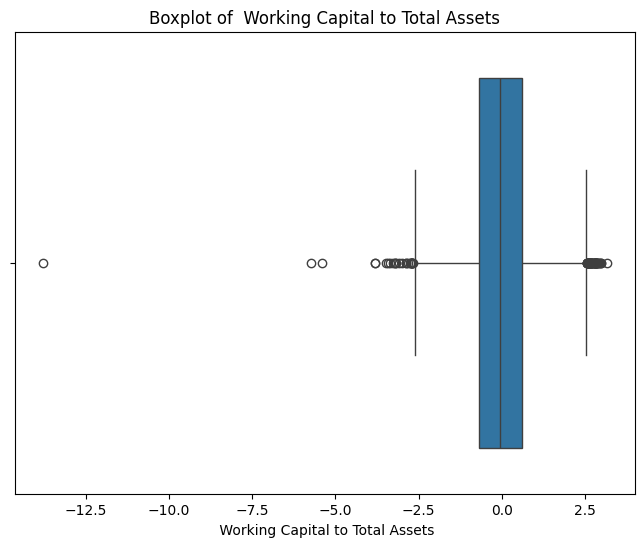

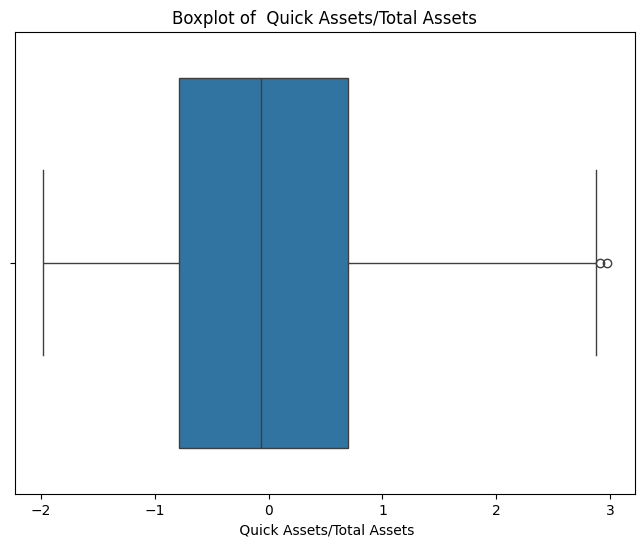

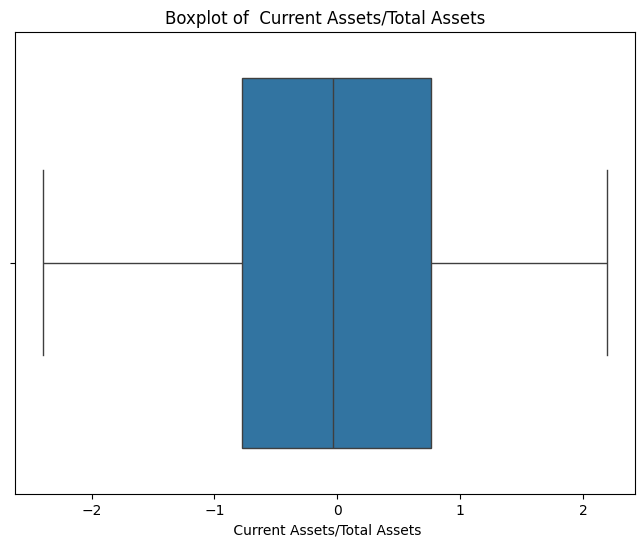

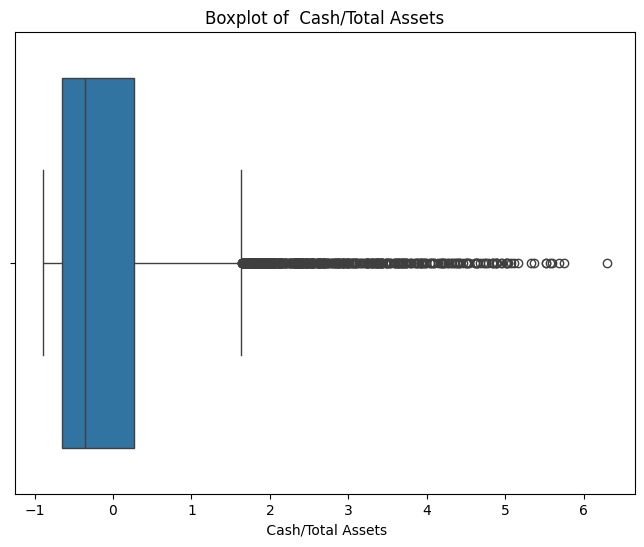

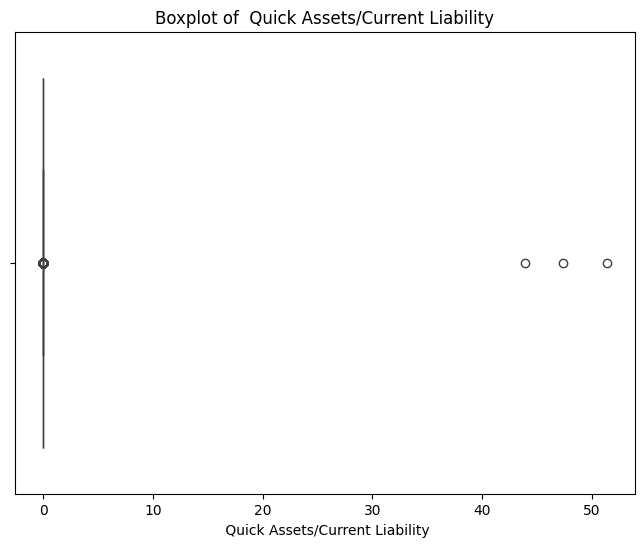

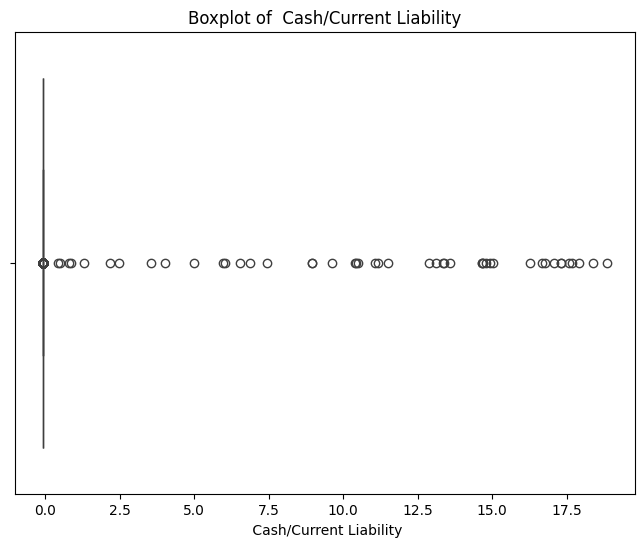

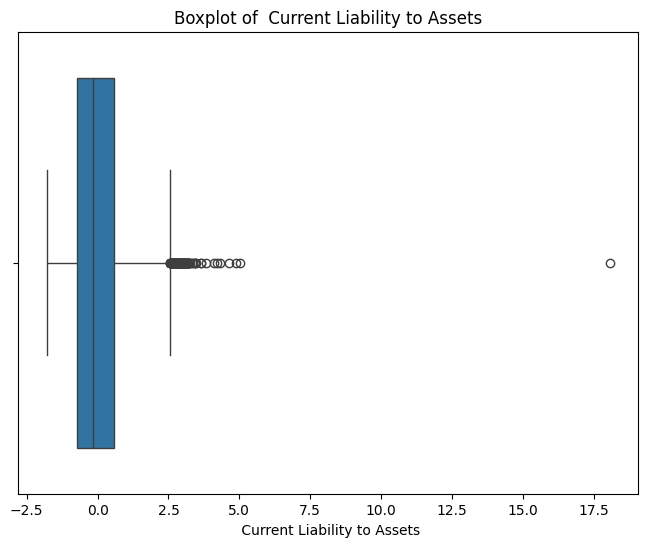

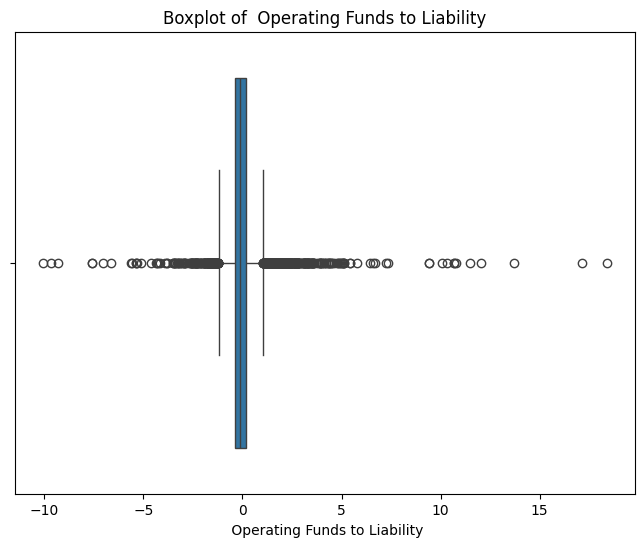

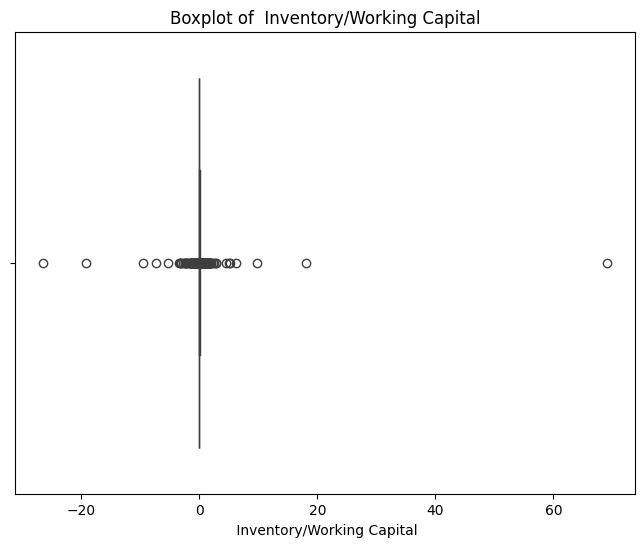

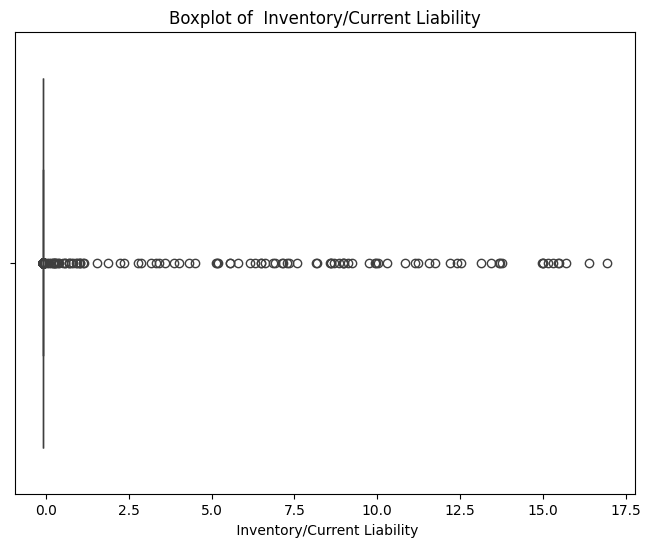

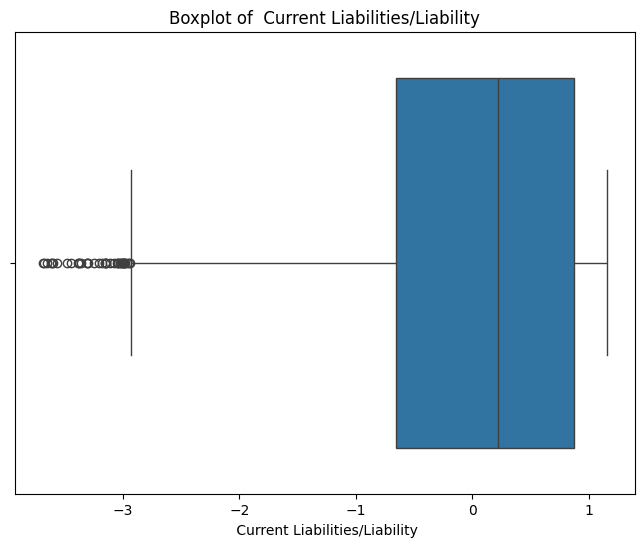

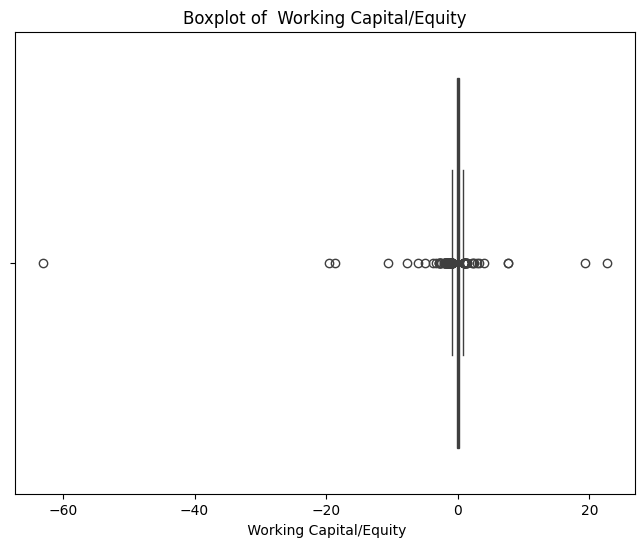

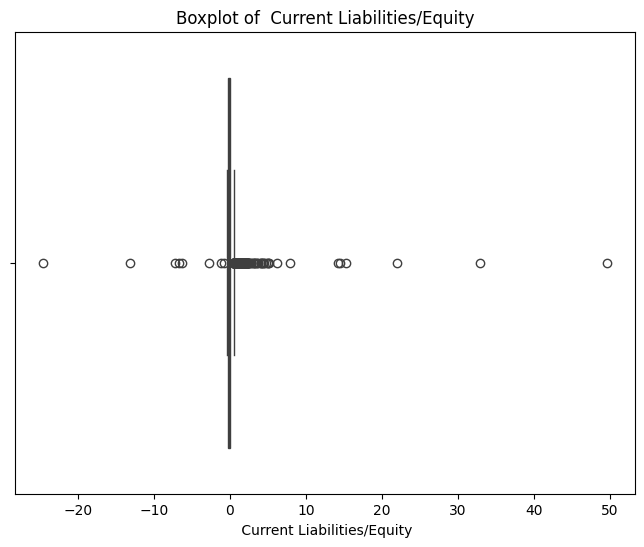

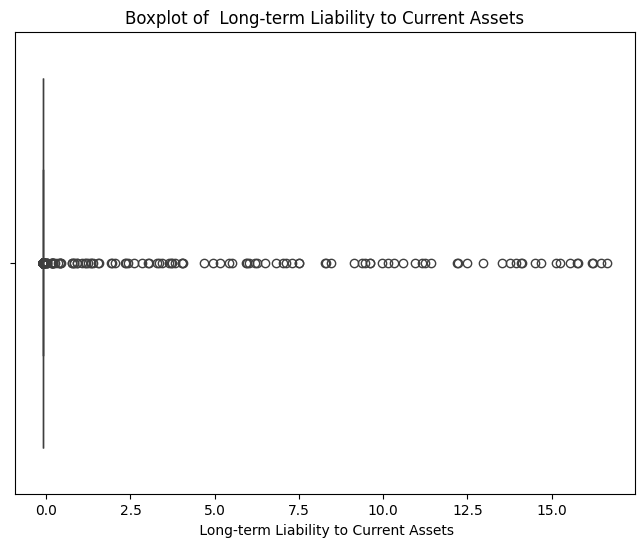

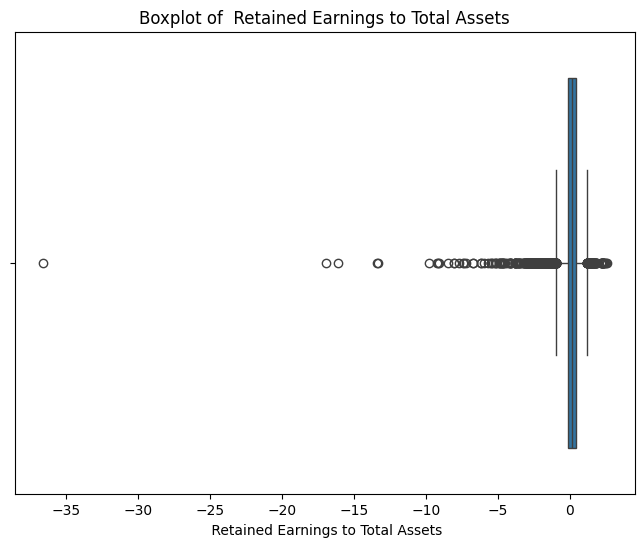

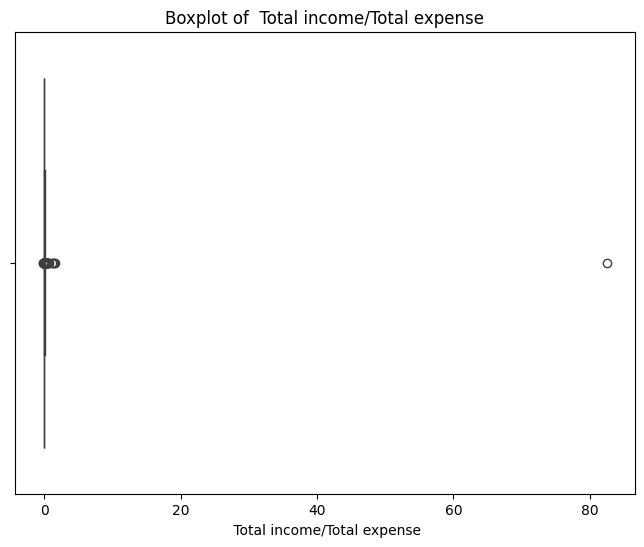

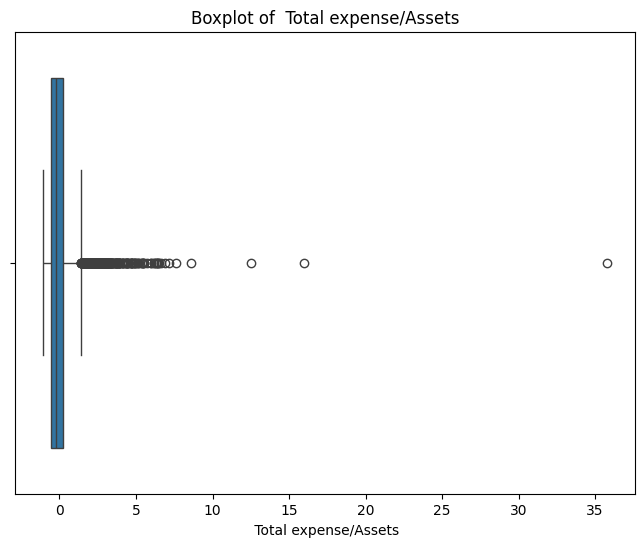

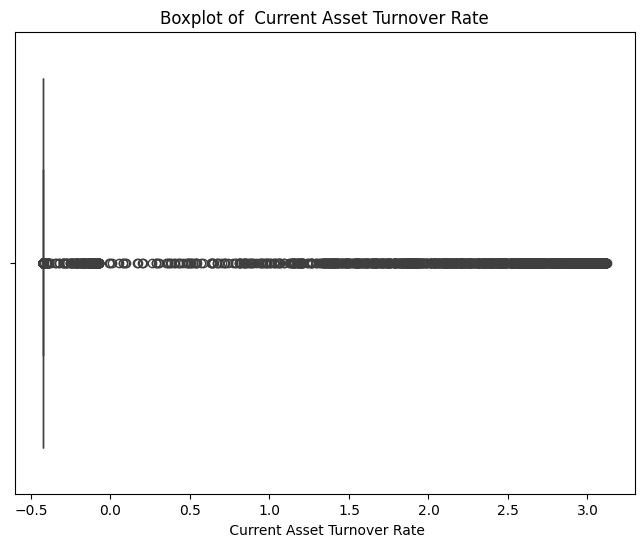

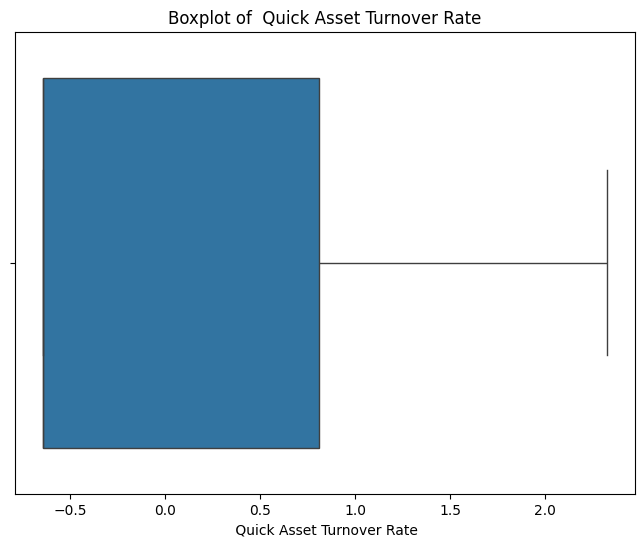

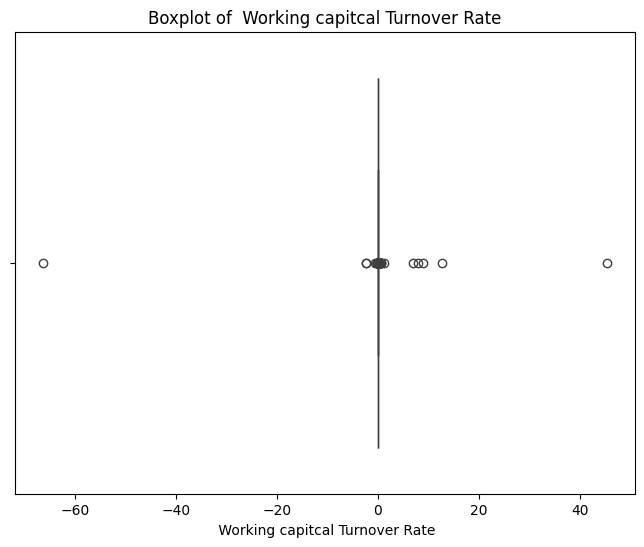

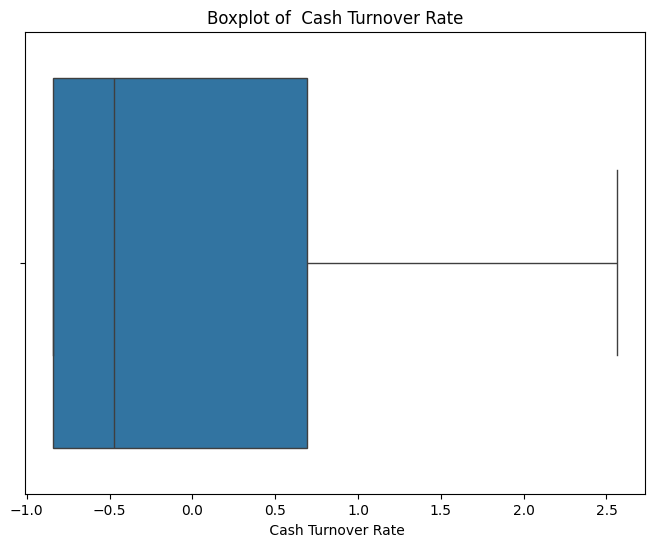

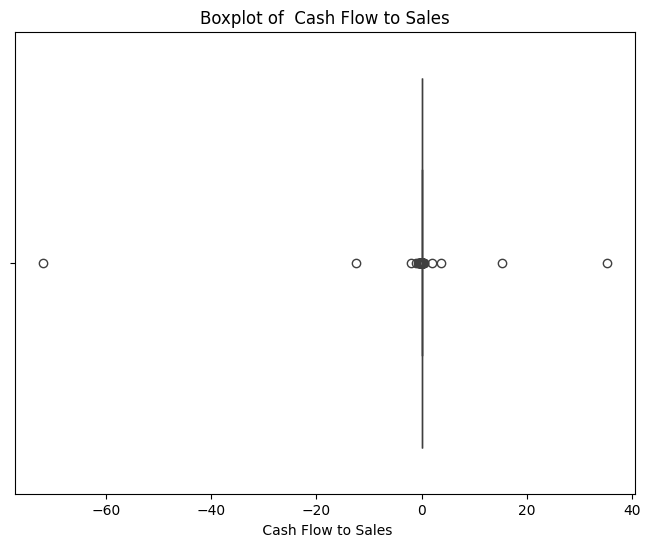

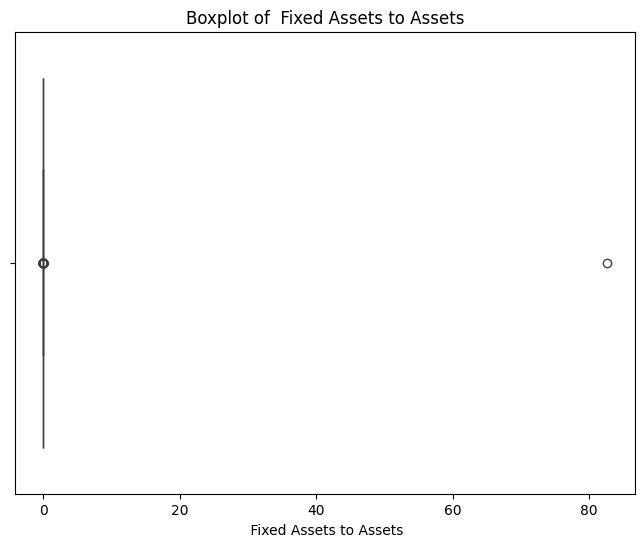

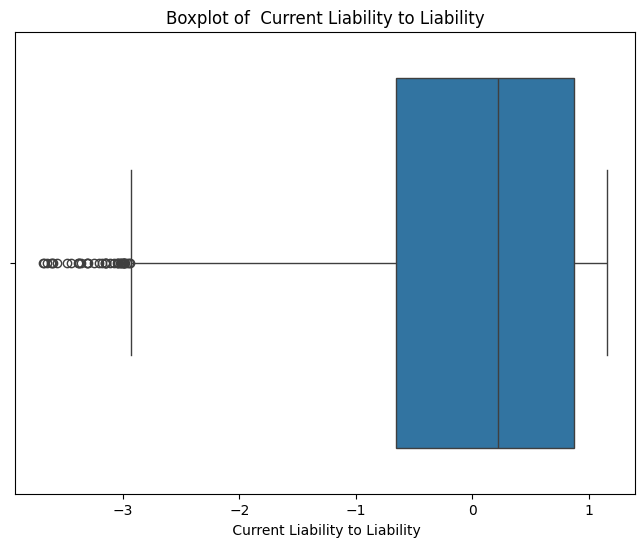

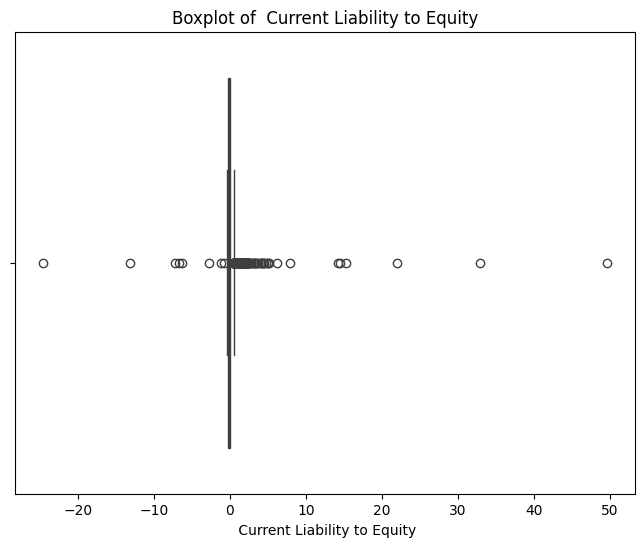

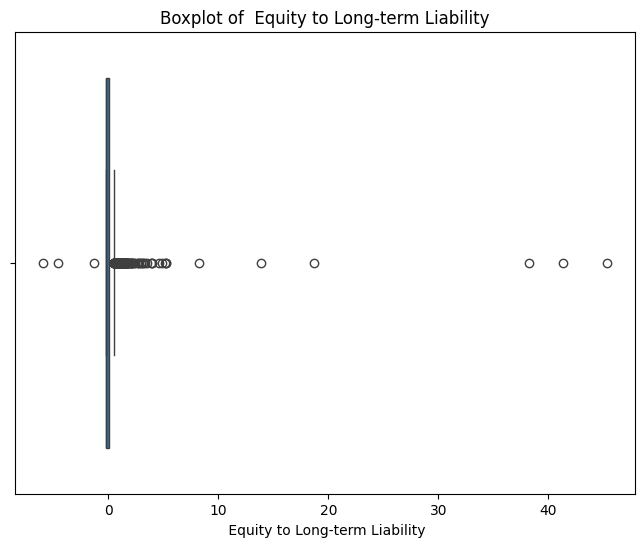

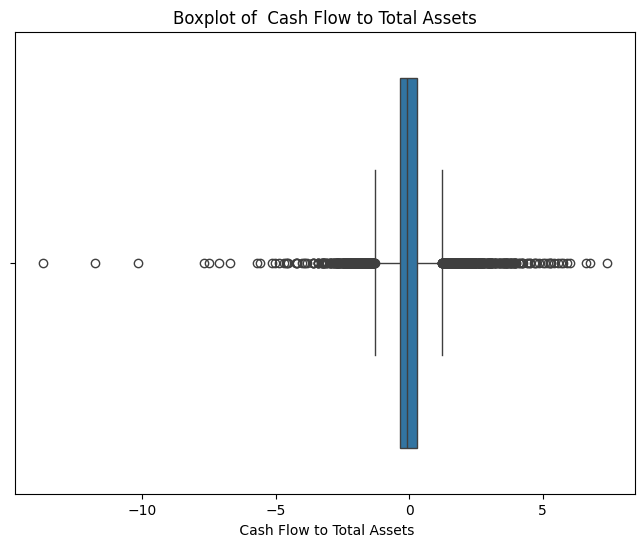

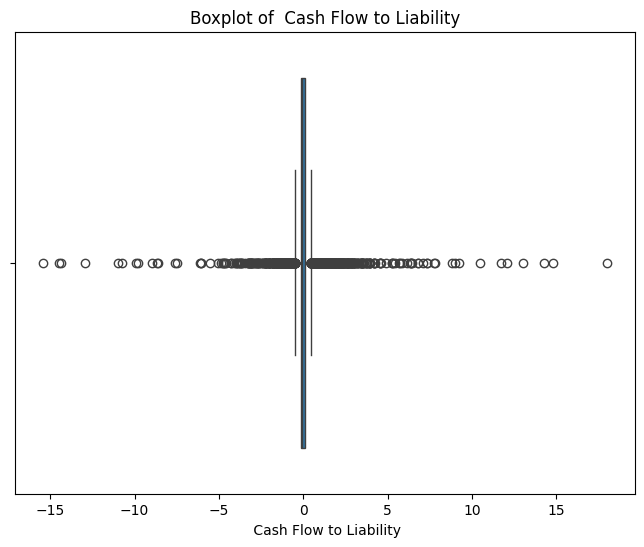

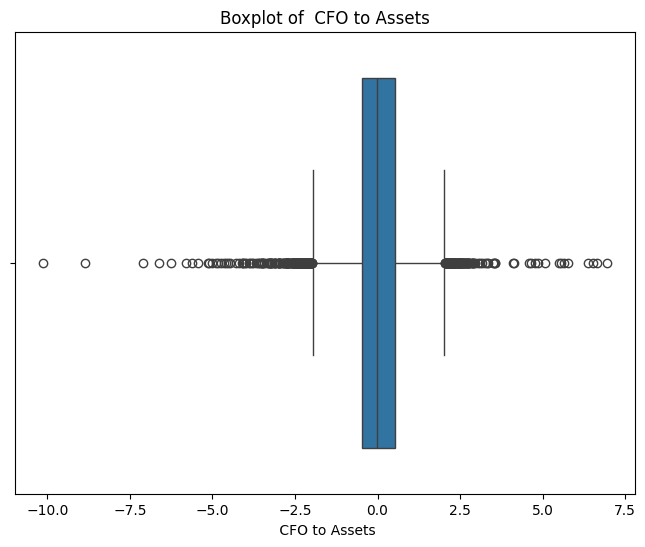

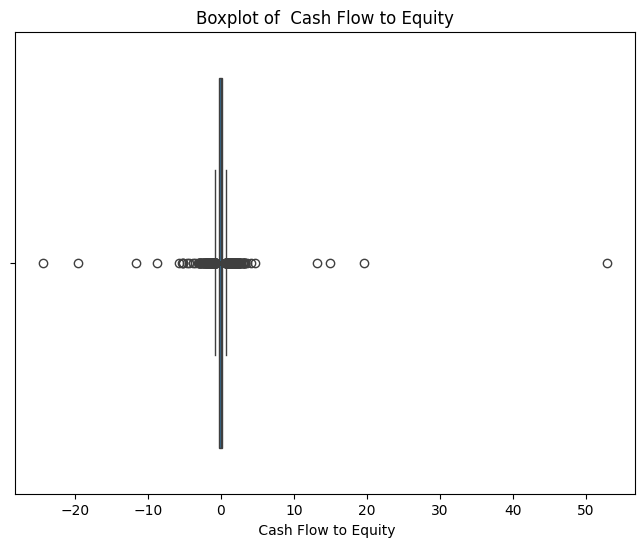

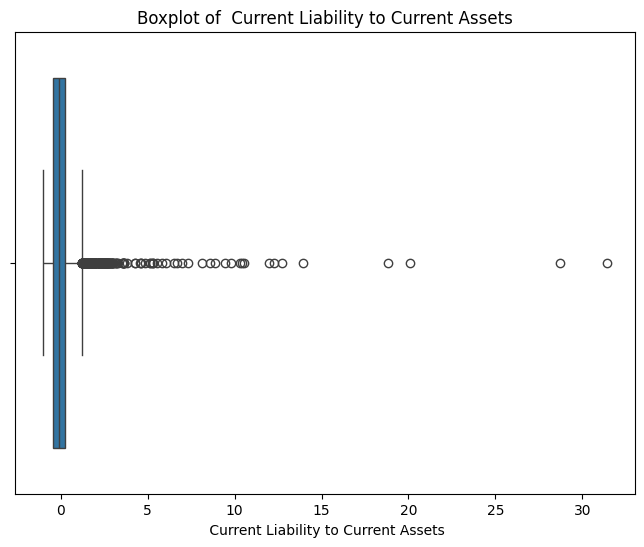

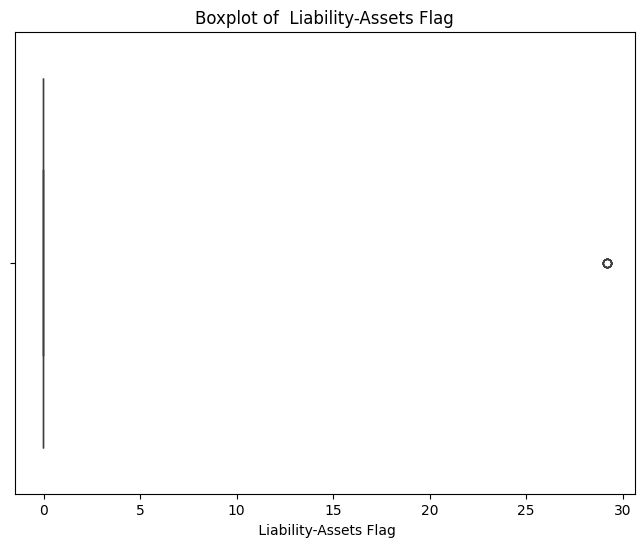

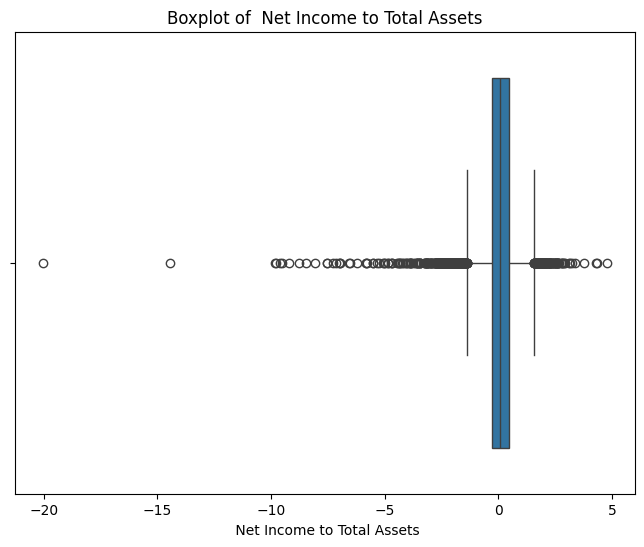

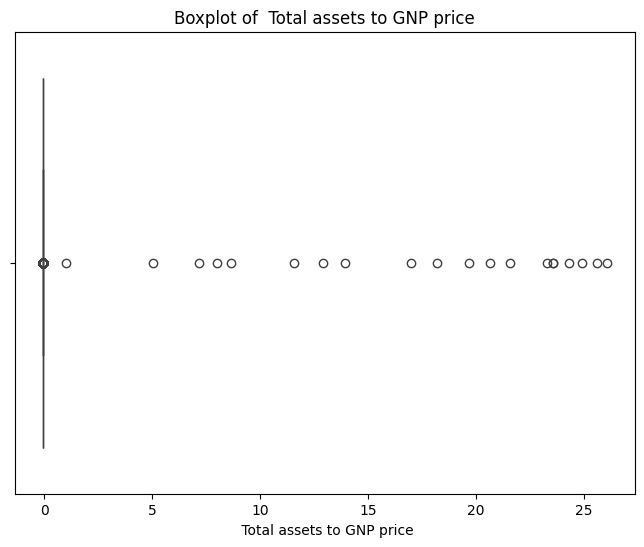

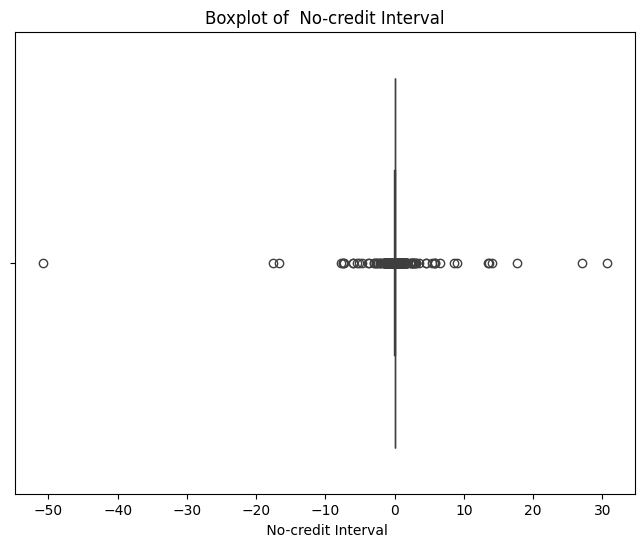

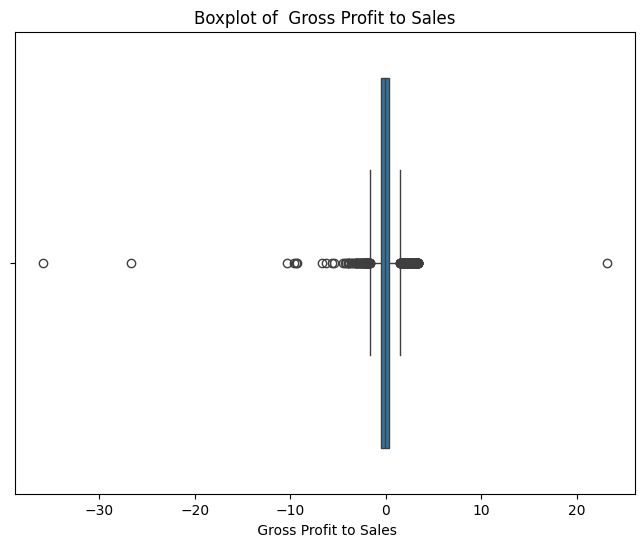

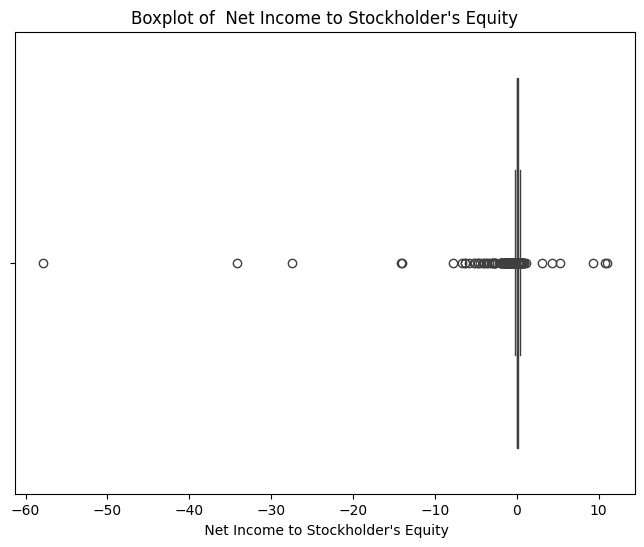

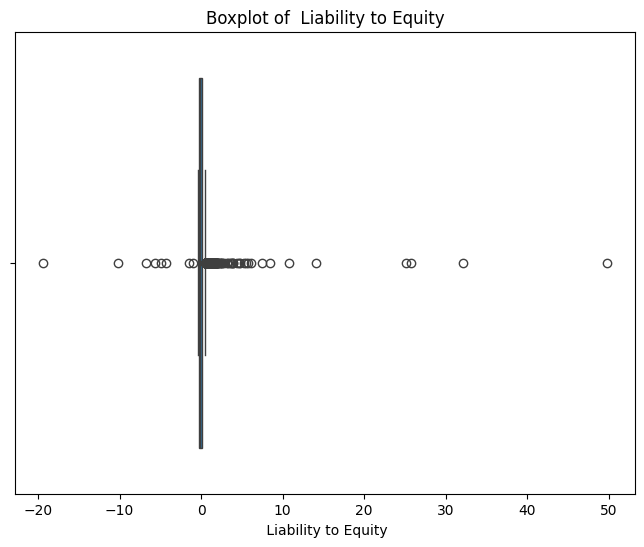

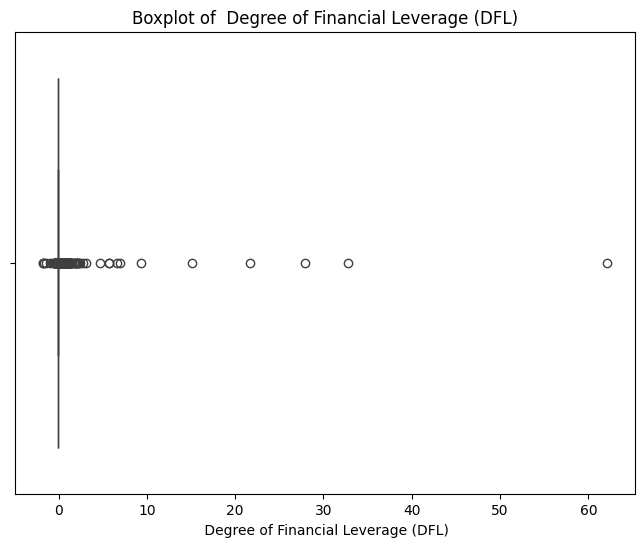

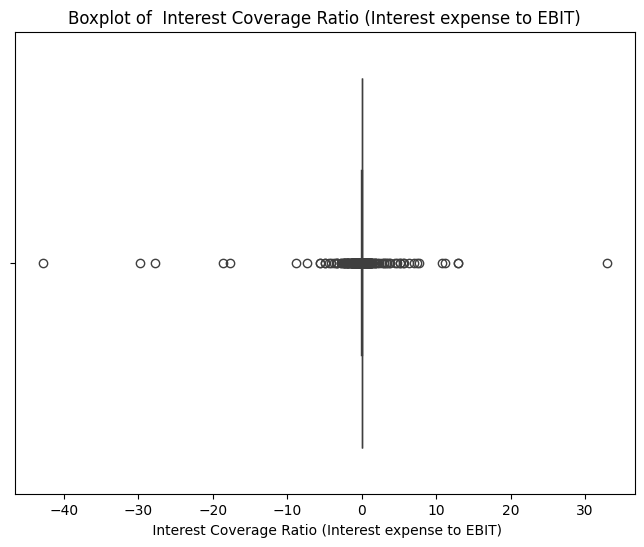

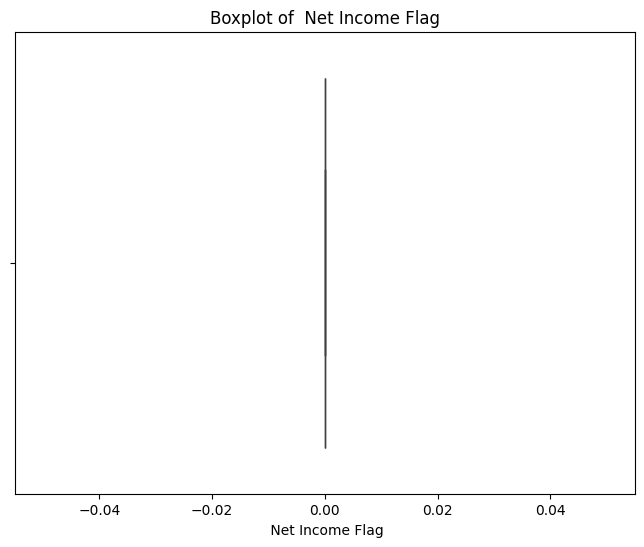

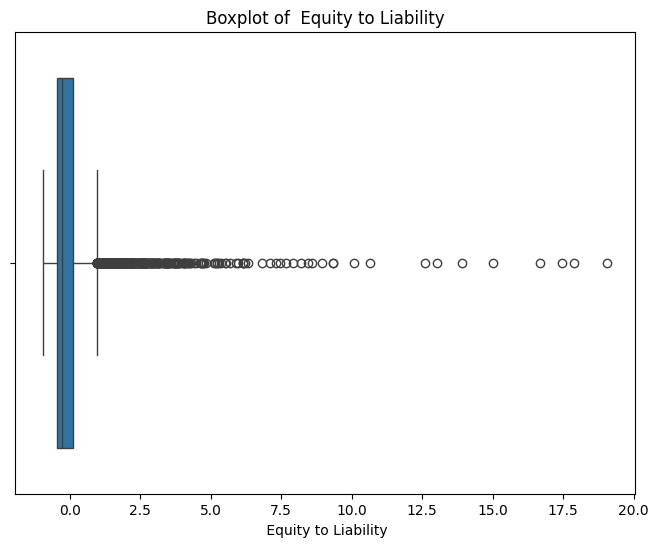

In [12]:
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

In [13]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                          -2.217909          
1             1                                          -0.673828          
2             1                                          -1.303672          
3             1                                          -1.735886          
4             1                                          -0.661778          
...         ...                                                ...          
6814          0                                          -0.189395          
6815          0                                          -0.494676          
6816          0                                          -0.534845          
6817          0                                           0.017875          
6818          0                                          -0.199839          

       ROA(A) before interest and % after tax  \
0                                   -2.045798   
1                                   -0.311068   
2                                   -0.908420   
3                                   -1.636209   
4                                   -0.307745   
...                                       ...   
6814                                -0.291959   
6815                                -0.310237   
6816                                -0.379194   
6817                                 0.019594   
6818                                 0.174956   

       ROA(B) before interest and depreciation after tax  \
0                                             -2.400361    
1                                             -0.598450    
2                                             -1.319910    
3                                             -1.556340    
4                                             -0.508050    
...                                                 ...    
6814                                          -0.168181    
6815                                          -0.477627    
6816                                          -0.534996    
6817                                           0.007403    
6818                                          -0.065612    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.383334                     -0.382638   
1                    0.135068                      0.136307   
2                   -0.383759                     -0.388177   
3                   -1.441418                     -1.441832   
4                   -0.541238                     -0.540708   
...                       ...                           ...   
6814                -0.206277                     -0.204969   
6815                -0.569328                     -0.568828   
6816                 0.147411                      0.135029   
6817                -0.005811                     -0.004720   
6818                 1.149313                      1.151617   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.016456                   -0.023516   
1                   0.014671                    0.014799   
2                   0.007858                   -0.061111   
3                  -0.004257                   -0.017313   
4                   0.016758                    0.013703   
...                      ...                         ...   
6814                0.018215                    0.017036   
6815                0.018223                    0.017455   
6816                0.017628                    0.016412   
6817                0.024494                    0.024099   
6818               -0.051874                    0.372776   

       After-tax net Interest Rate  \
0                        -0.020165   
1                         0.015966   
2                        -0.051183   
3                        -0.008676   
4                         0.016186   
...                            ...   
6814                      0

**outlier handling using IQR technique by determine lower bound and upper bound of numeric columns in dataset**

In [14]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower_bound, upper_bound)

In [15]:
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [16]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                          -1.931507          
1             1                                          -0.673828          
2             1                                          -1.303672          
3             1                                          -1.735886          
4             1                                          -0.661778          
...         ...                                                ...          
6814          0                                          -0.189395          
6815          0                                          -0.494676          
6816          0                                          -0.534845          
6817          0                                           0.017875          
6818          0                                          -0.199839          

       ROA(A) before interest and % after tax  \
0                                   -1.577429   
1                                   -0.311068   
2                                   -0.908420   
3                                   -1.577429   
4                                   -0.307745   
...                                       ...   
6814                                -0.291959   
6815                                -0.310237   
6816                                -0.379194   
6817                                 0.019594   
6818                                 0.174956   

       ROA(B) before interest and depreciation after tax  \
0                                             -1.811241    
1                                             -0.598450    
2                                             -1.319910    
3                                             -1.556340    
4                                             -0.508050    
...                                                 ...    
6814                                          -0.168181    
6815                                          -0.477627    
6816                                          -0.534996    
6817                                           0.007403    
6818                                          -0.065612    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                   -0.383334                     -0.382638   
1                    0.135068                      0.136307   
2                   -0.383759                     -0.388177   
3                   -1.441418                     -1.441832   
4                   -0.541238                     -0.540708   
...                       ...                           ...   
6814                -0.206277                     -0.204969   
6815                -0.569328                     -0.568828   
6816                 0.147411                      0.135029   
6817                -0.005811                     -0.004720   
6818                 1.149313                      1.151617   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.016456                   -0.007256   
1                   0.014671                    0.014799   
2                   0.007858                   -0.007256   
3                   0.002007                   -0.007256   
4                   0.016758                    0.013703   
...                      ...                         ...   
6814                0.018215                    0.017036   
6815                0.018223                    0.017455   
6816                0.017628                    0.016412   
6817                0.024494                    0.024099   
6818                0.002007                    0.052733   

       After-tax net Interest Rate  \
0                        -0.000625   
1                         0.015966   
2                        -0.000625   
3                        -0.000625   
4                         0.016186   
...                            ...   
6814                      0

# **XGBoost Model**
**for paper**: https://www.aimspress.com/article/doi/10.3934/DSFE.2021010?viewType=HTML

In [17]:
print(data['Bankrupt?'].value_counts())


Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [18]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

**Split the dataset**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Normalize the features**

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train SVM classifier with RBF kernel**

In [21]:
# Define the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42)

In [22]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Predictions**

In [23]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

**Evaluations**

In [24]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9626099706744868


In [25]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.50      0.24      0.32        51

    accuracy                           0.96      1364
   macro avg       0.74      0.61      0.65      1364
weighted avg       0.95      0.96      0.96      1364



In [26]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1301   12]
 [  39   12]]


In [27]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

ROC AUC Score: 0.9221809058733927


**ROC Curve**

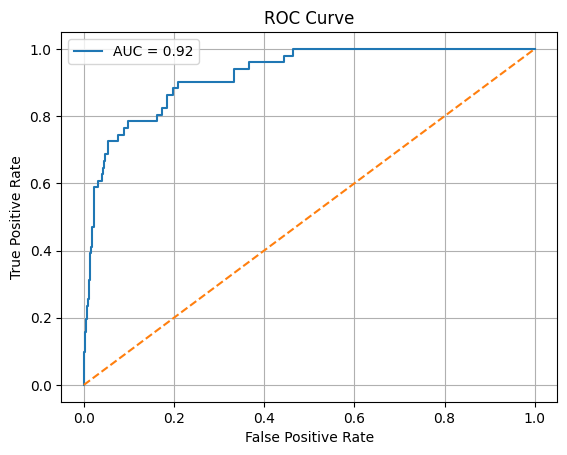

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

**Explainability techniques**

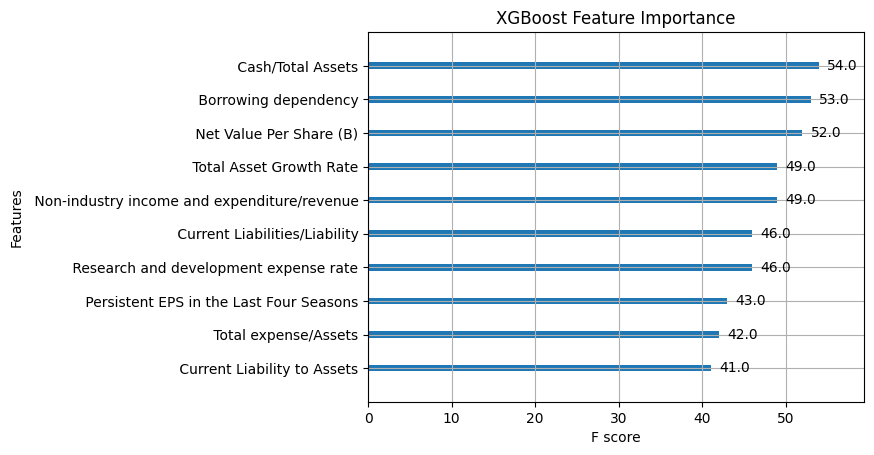

In [29]:
# 1. Feature Importance Plot
xgb.plot_importance(model, max_num_features=10)
plt.title("XGBoost Feature Importance")
plt.show()

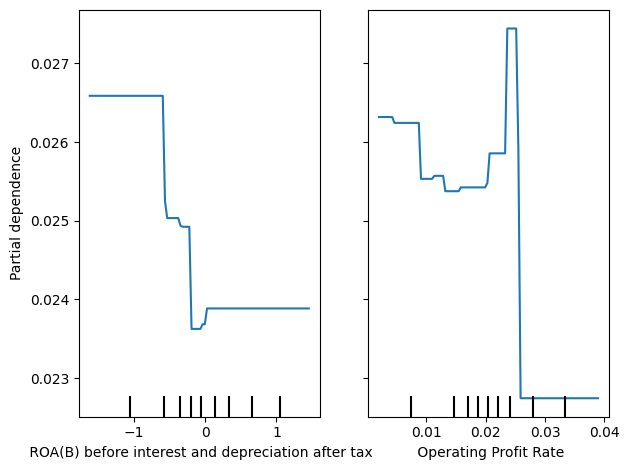

In [30]:
# 2. Partial Dependence Plot (PDP)
features_to_plot = [2, 5]  # Change based on your most important features
PartialDependenceDisplay.from_estimator(model, X_test, features_to_plot)
plt.tight_layout()
plt.show()

In [31]:
# 3. LIME Explanation
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No', 'Yes'],
    mode='classification'
)
i = 0  # Index of sample to explain
exp = explainer.explain_instance(X_test.iloc[i].values, model.predict_proba, num_features=5)
print("LIME explanation for sample", i)
exp.show_in_notebook(show_table=True)

LIME explanation for sample 0


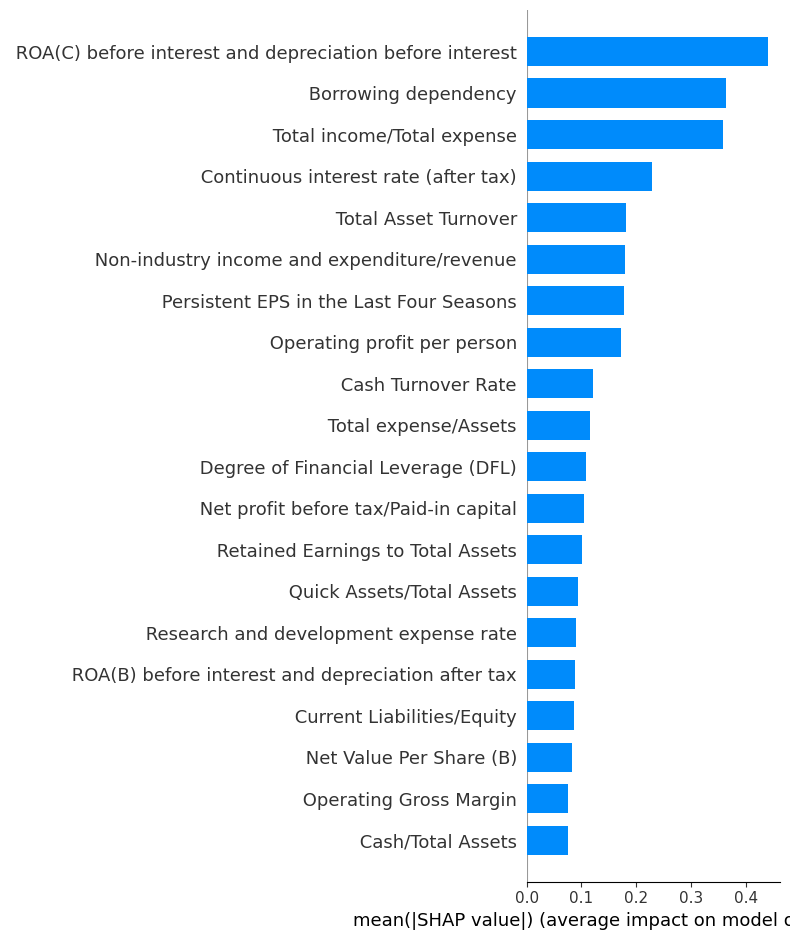

In [32]:
# 4. SHAP Explanation
explainer_shap = shap.Explainer(model, X_train)
shap_values = explainer_shap(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

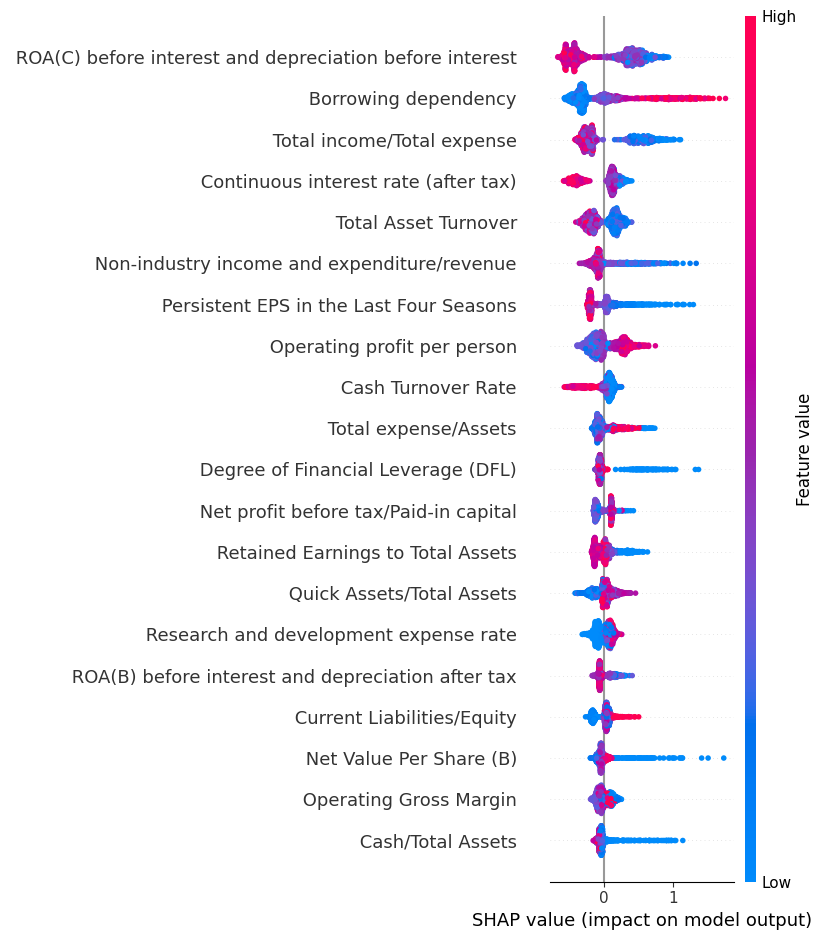

In [33]:
shap.summary_plot(shap_values, X_test)  # beeswarm plot

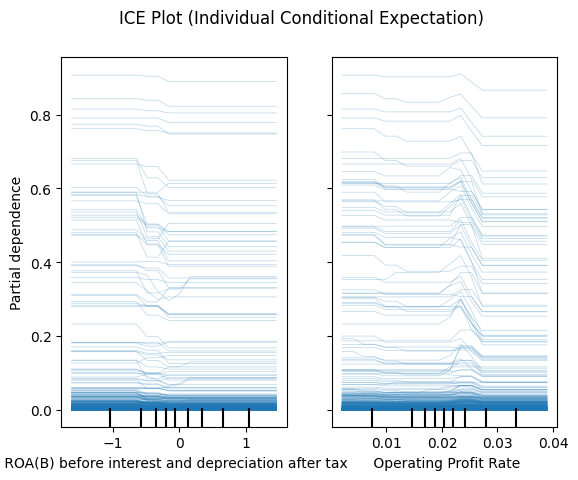

In [34]:
# ICE Plot (corrected version using updated API)
features = [2, 5]  # Choose top features based on importance or domain
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features,
    kind='individual',
    grid_resolution=20
)
plt.suptitle("ICE Plot (Individual Conditional Expectation)")
plt.show()

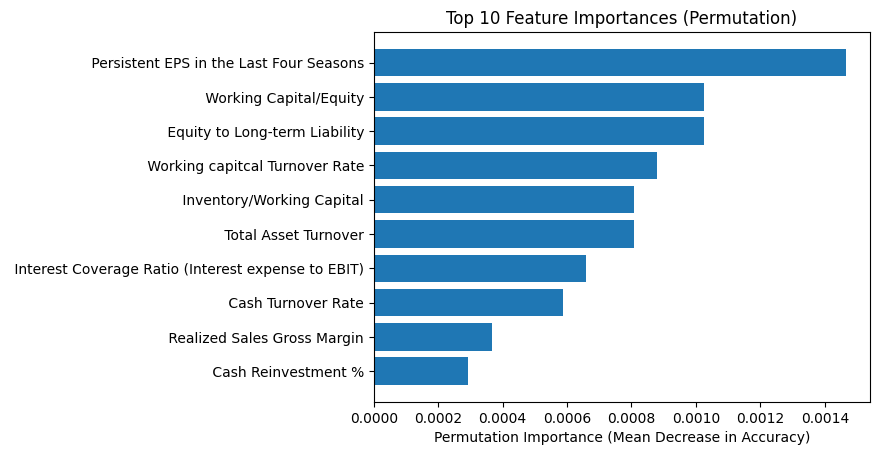

In [35]:
# 2. Permutation Feature Importance
perm_result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
)

# Show top 10 features
sorted_idx = perm_result.importances_mean.argsort()[::-1][:10]
plt.barh(np.array(X.columns)[sorted_idx], perm_result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (Mean Decrease in Accuracy)")
plt.title("Top 10 Feature Importances (Permutation)")
plt.gca().invert_yaxis()
plt.show()

**RFE "Recursive Feature Elimination"**

It's a feature selection technique that helps to choose the most important features from your dataset.

The mechanism:
beggin with all your features, trains a model, Then removes least important feature for it, and repeats this process recursively until the desired number of features is left.

In [38]:
# RFE with desired number of features
rfe = RFE(estimator=model, n_features_to_select=10)  # Change to your desired number of features
rfe.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=0.1, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=5, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=100, n_jobs=None,
                            num_parallel_tree=None, random_state=42, ...),
    n_features_to_select=10)

In [39]:
# Evaluate performance with selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.54      0.25      0.35        51

    accuracy                           0.96      1364
   macro avg       0.76      0.62      0.66      1364
weighted avg       0.96      0.96      0.96      1364



In [41]:
selector = RFE(estimator=model, n_features_to_select=10)
selector.fit(X_train_scaled, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric='auc',
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=0.1, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=5, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=100, n_jobs=None,
                            num_parallel_tree=None, random_state=42, ...),
    n_features_to_select=10)

In [42]:
#Selected features
selected_features = X.columns[selector.support_]
print(" Selected Features:\n", selected_features)

 Selected Features:
 Index([' ROA(C) before interest and depreciation before interest',
       ' Non-industry income and expenditure/revenue',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Net Value Growth Rate', ' Quick Ratio', ' Total debt/Total net worth',
       ' Borrowing dependency', ' Total income/Total expense',
       ' Net Income to Stockholder's Equity'],
      dtype='object')


In [43]:
#Reduce train/test to selected features
X_train_rfe = X_train_scaled[:, selector.support_]
X_test_rfe = X_test_scaled[:, selector.support_]

In [44]:
model.fit(X_train_rfe, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [45]:
#Permutation Importance on the selected features
results = permutation_importance(
    model, X_test_rfe, y_test,
    n_repeats=10, random_state=42, scoring='f1')

In [46]:
#Map importance scores to selected features
importance_scores = pd.Series(results.importances_mean, index=selected_features)
print("\n Permutation Importance (mean decrease in F1):")
print(importance_scores.sort_values(ascending=False))



 Permutation Importance (mean decrease in F1):
Persistent EPS in the Last Four Seasons                    0.256792
Net Value Growth Rate                                      0.229933
ROA(C) before interest and depreciation before interest    0.135949
Non-industry income and expenditure/revenue                0.133825
Total debt/Total net worth                                 0.128112
Quick Ratio                                                0.095529
Borrowing dependency                                       0.035352
Total income/Total expense                                 0.011023
Net Value Per Share (B)                                   -0.048473
Net Income to Stockholder's Equity                        -0.066267
dtype: float64


**Plot confusion matrix**

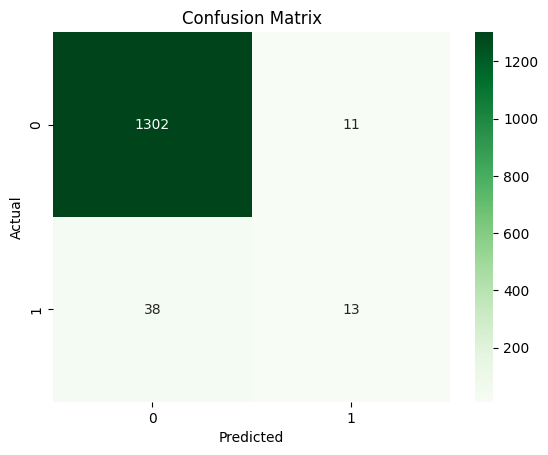

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()